### Preprocessing and Data Exploration

In [330]:
import pandas as pd
import numpy as np

#IDK why bottom values are gone! No clue! Something happened... These values do exists in the excel sheet but are not
#being loaded in by pandas.
df = pd.read_csv('AirQualityUCI_CSV.csv', parse_dates = [['Date', 'Time']])

In [331]:
#Remove last two columns that came about due to parsing. Remove the nan rows that exist for some stupid reason
df = df.iloc[:,:14]
df = df.loc[:9356, :]
df

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,2005-04-04 13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [332]:
#Set the date_time as index
#df = df.set_index('Date_Time')

In [333]:
#Nothing interesting to report for column datatypes
df.dtypes

Date_Time        datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [334]:
df.columns

Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [335]:
#Convert the -200 values to nan so its easier to replace with column means
df[df == -200] = np.nan
for x in df.columns[1:]:
    df[x] = df[x].fillna(df[x].mean())
df

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04 11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04 12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04 13:00:00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [336]:
#Values in the data frame are faily large compared to each other. Data is to be normalized.
df.set_index('Date_Time')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [337]:
df.dtypes

Date_Time        datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [338]:
cormatrix = df.corr()
round(cormatrix,2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.00,0.77,0.29,0.81,0.80,0.76,-0.61,0.65,0.56,0.76,0.02,0.04,0.04
PT08.S1(CO),0.77,1.00,0.28,0.88,0.89,0.62,-0.77,0.56,0.68,0.90,0.05,0.11,0.14
NMHC(GT),0.29,0.28,1.00,0.28,0.28,0.10,-0.26,0.16,0.23,0.24,0.07,-0.05,0.04
C6H6(GT),0.81,0.88,0.28,1.00,0.98,0.62,-0.74,0.54,0.77,0.87,0.20,-0.06,0.17
PT08.S2(NMHC),0.80,0.89,0.28,0.98,1.00,0.60,-0.80,0.56,0.78,0.88,0.24,-0.09,0.19
NOx(GT),0.76,0.62,0.10,0.62,0.60,1.00,-0.56,0.76,0.21,0.69,-0.24,0.19,-0.13
PT08.S3(NOx),-0.61,-0.77,-0.26,-0.74,-0.80,-0.56,1.00,-0.57,-0.54,-0.80,-0.15,-0.06,-0.23
NO2(GT),0.65,0.56,0.16,0.54,0.56,0.76,-0.57,1.00,0.14,0.63,-0.17,-0.08,-0.29
PT08.S4(NO2),0.56,0.68,0.23,0.77,0.78,0.21,-0.54,0.14,1.00,0.59,0.56,-0.03,0.63
PT08.S5(O3),0.76,0.90,0.24,0.87,0.88,0.69,-0.80,0.63,0.59,1.00,-0.03,0.12,0.07


<AxesSubplot:>

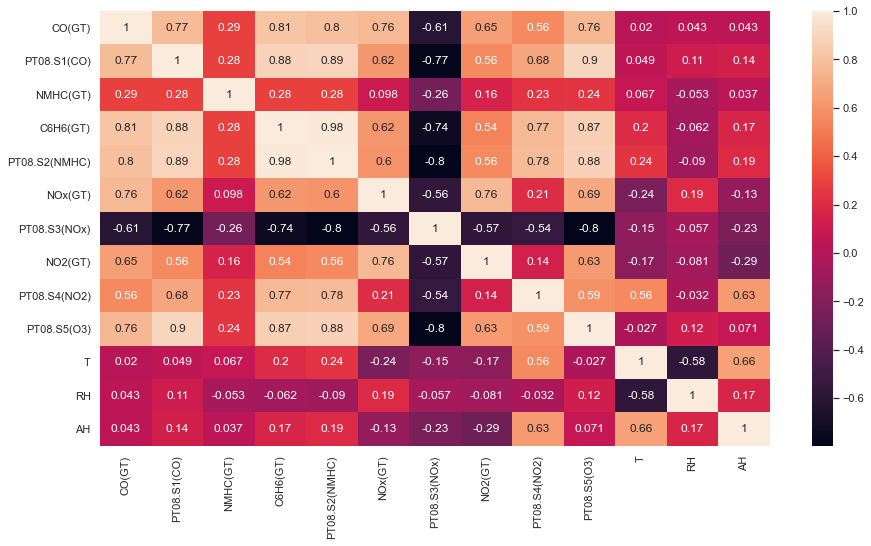

In [339]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cormatrix, annot = True)

In [340]:
#Pair off the true and sensor data to make sure they correlate and visualize. If they dont correlate then the sensor may be inaccurate.
co_pair = ['CO(GT)', 'PT08.S1(CO)']
nmhc_pair = ['NMHC(GT)', 'PT08.S2(NMHC)']
nox_pair = ['NOx(GT)', 'PT08.S3(NOx)']
no2_pair = ['NO2(GT)', 'PT08.S4(NO2)']

#This pair I am not sure about as the chemical formula does not match the sensor name. This has the potential to be dropped.
ozone_pair = ['C6H6(GT)', 'PT08.S5(O3)']

#Create indivdual dataframes to display the data
CO = pd.DataFrame(df, columns = co_pair)
NMHC = pd.DataFrame(df, columns = nmhc_pair)
NOX = pd.DataFrame(df, columns = nox_pair)
NO2 = pd.DataFrame(df, columns = no2_pair)
OZONE = pd.DataFrame(df, columns = ozone_pair)

R-value/p-value


(0.7733939346903463, 0.0)

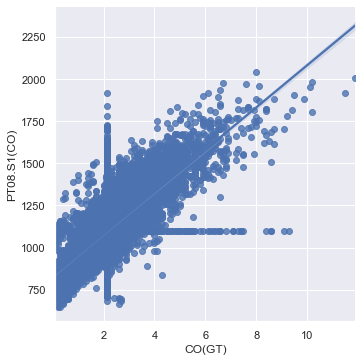

In [341]:
#Display data and correlation for indivdual varaibles
from scipy import stats
sns.lmplot(x = "CO(GT)", y = "PT08.S1(CO)", data = CO)
print("R-value/p-value")
stats.pearsonr(CO['CO(GT)'], CO['PT08.S1(CO)'])

<AxesSubplot:>

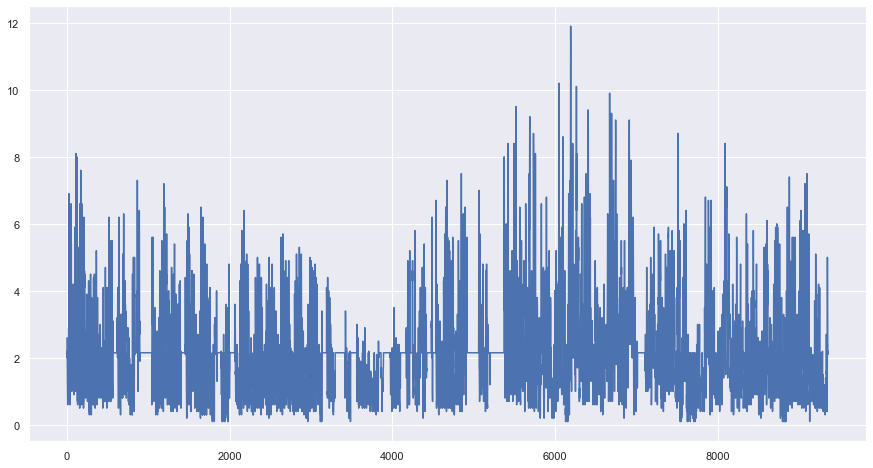

In [342]:
CO['CO(GT)'].plot()

<AxesSubplot:>

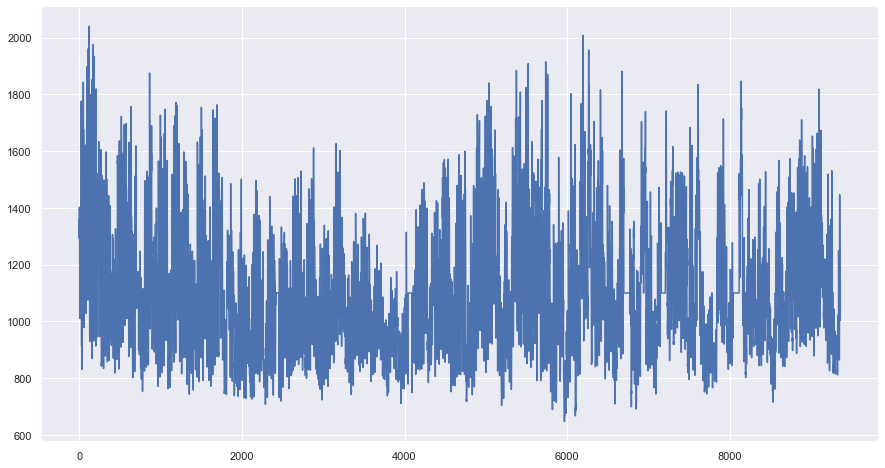

In [343]:
CO['PT08.S1(CO)'].plot()

R-value/p-value


(0.27976058161235395, 8.162855684737234e-168)

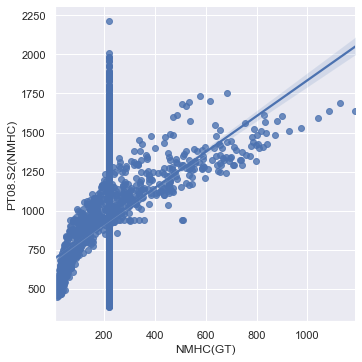

In [344]:
sns.lmplot(x = "NMHC(GT)", y = "PT08.S2(NMHC)", data = NMHC)
print("R-value/p-value")
stats.pearsonr(NMHC['NMHC(GT)'], NMHC['PT08.S2(NMHC)'])

<AxesSubplot:>

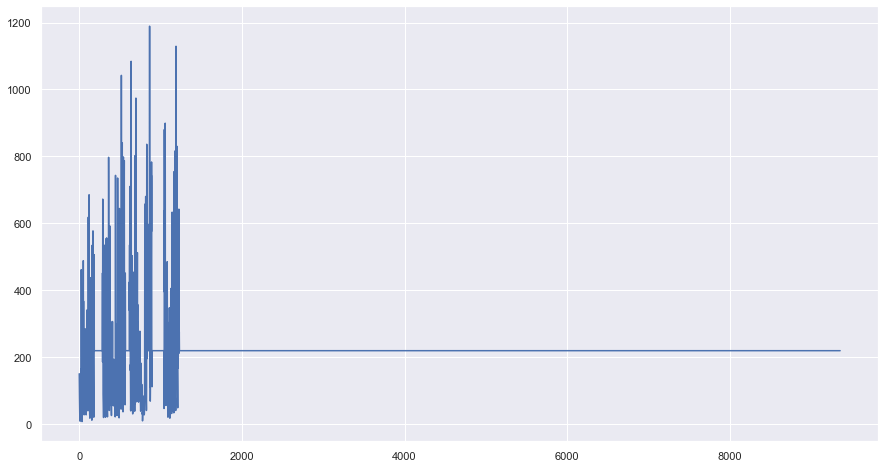

In [345]:
#It appears that the NMHC had a majority of its values missing
#That means this column will be removed from further consideration
NMHC['NMHC(GT)'].plot()

<AxesSubplot:>

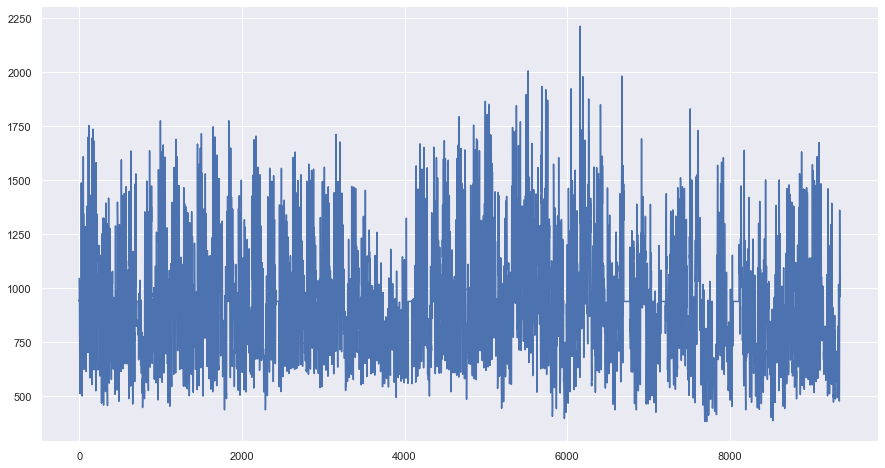

In [346]:
NMHC['PT08.S2(NMHC)'].plot()

R-value/p-value


(-0.5632703509927857, 0.0)

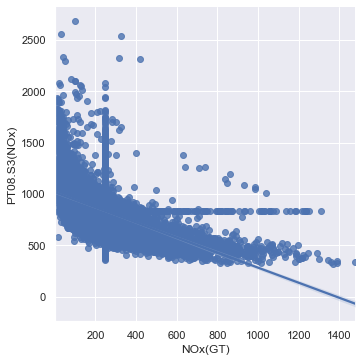

In [347]:
#NOx(GT) PT08.S3(NOx)
sns.lmplot(x = "NOx(GT)", y = "PT08.S3(NOx)", data = NOX)
print("R-value/p-value")
stats.pearsonr(NOX['NOx(GT)'], NOX['PT08.S3(NOx)'])

<AxesSubplot:>

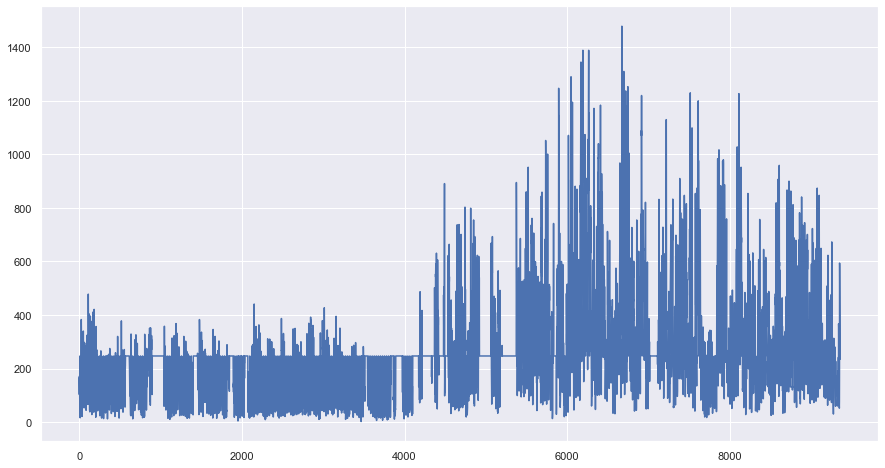

In [348]:
NOX['NOx(GT)'].plot()

<AxesSubplot:>

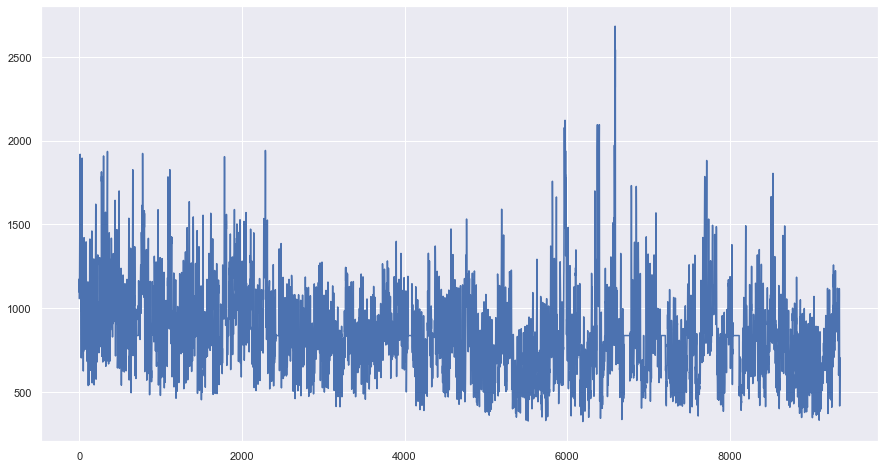

In [349]:
NOX['PT08.S3(NOx)'].plot()

R-value/p-value


(0.1406552883328936, 1.4921977177683796e-42)

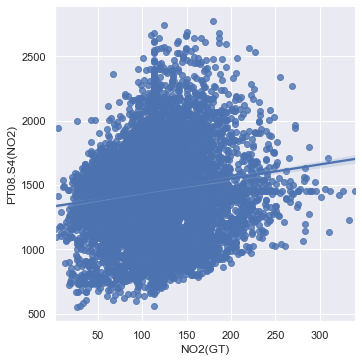

In [350]:
#NO2(GT) PT08.S4(NO2)
sns.lmplot(x = "NO2(GT)", y = "PT08.S4(NO2)", data = NO2)
print("R-value/p-value")
stats.pearsonr(NO2['NO2(GT)'], NO2['PT08.S4(NO2)'])

<AxesSubplot:>

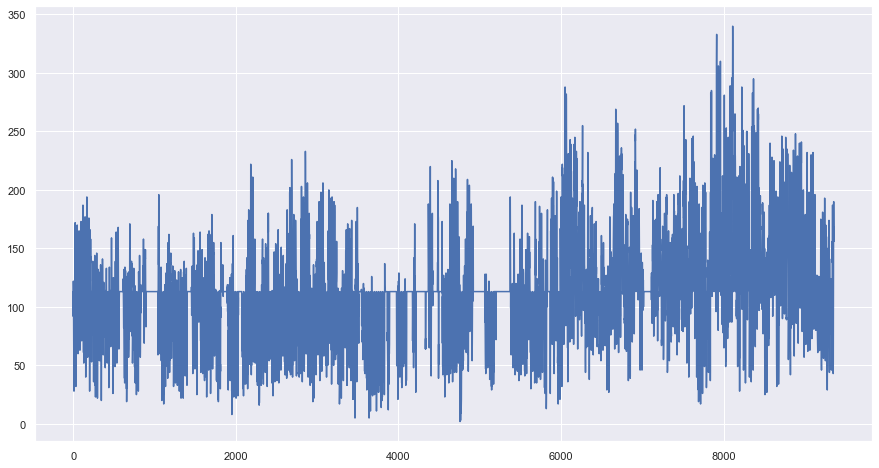

In [351]:
NO2['NO2(GT)'].plot()

<AxesSubplot:>

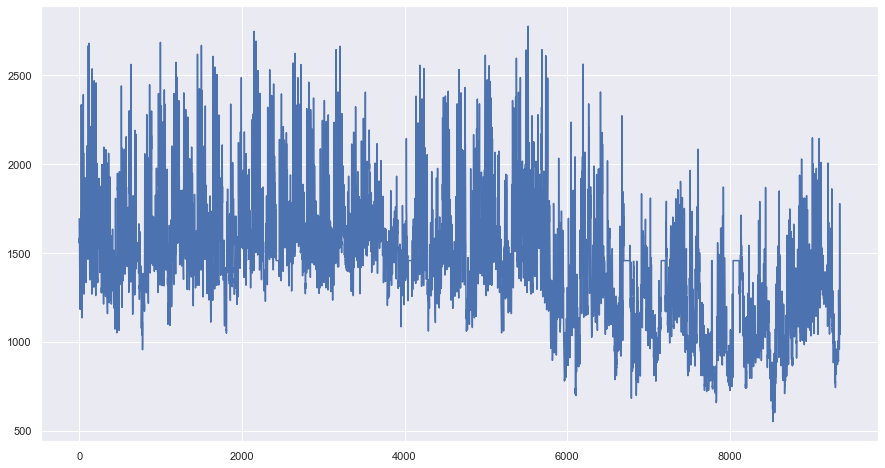

In [352]:
NO2['PT08.S4(NO2)'].plot()

R-value/p-value


(0.8656885045054727, 0.0)

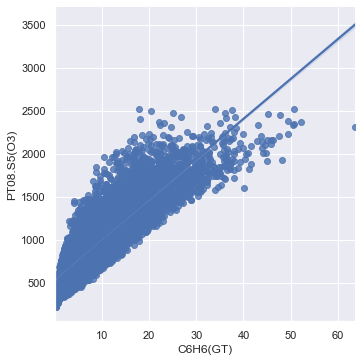

In [353]:
#C6H6(GT) PT08.S5(O3)
sns.lmplot(x = "C6H6(GT)", y = "PT08.S5(O3)", data = OZONE)
print("R-value/p-value")
stats.pearsonr(OZONE['C6H6(GT)'], OZONE['PT08.S5(O3)'])

<AxesSubplot:>

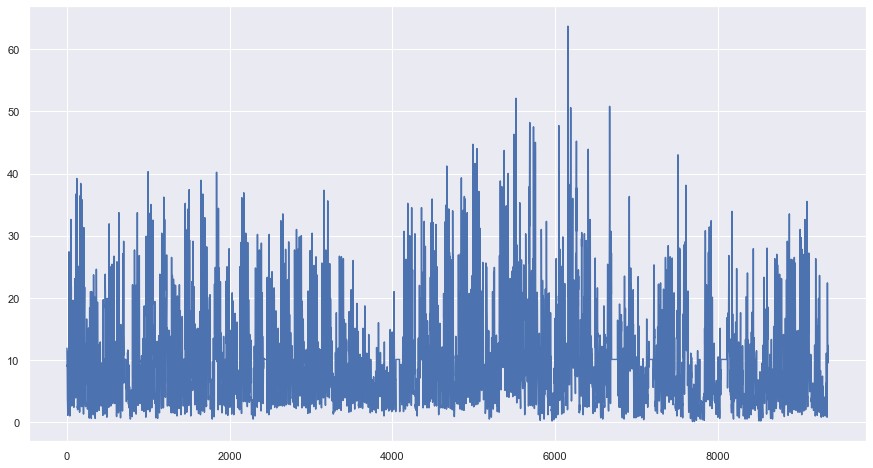

In [354]:
OZONE['C6H6(GT)'].plot()

<AxesSubplot:>

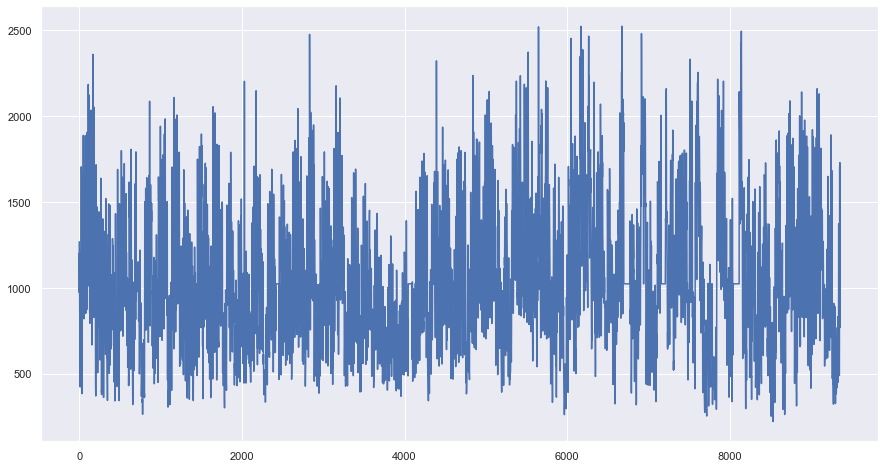

In [355]:
OZONE['PT08.S5(O3)'].plot()

#### Only two pairs of sensors and ground truths show correlation however, according to the dataset description the Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. The information I found on correlating the reference to the ground truth may not be accurate or is tainted because there is too much missing data in the datasets for an accurate correlation or the correlation in the examples I found use smaller windows with higher correlation (examples showed they used hour-long windows). Regardless the NMHC(GT) i.e. Non Metanic Hydrocarbons ground truth is out of consideration due to the large amount of missing data as well as the sensor since something is wrong with the data from the associated ground truth, making it a bit untrustworthy. The Benzene ground truth and Ozone sensors are highly correlated and are missing the least amount of data. Most other ground truths appear to be missing data at a number of points but, are still mostly useable. So I will continue my analysis with CO, Benzene, Total Nitrogen Oxides, and Nitrogen Dioxide.

In [356]:
#Drop the columns removed from consideration
new_df = df.drop(['NMHC(GT)', 'PT08.S2(NMHC)'], axis = 1)

### Start of FB Prophet Model -- CO Model

In [357]:
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
#Need to prepare dataset specfically for FB Prophet
#Dates need to be located in a column labeled ds and values in the y column
new_df = new_df.set_index('Date_Time')

In [358]:
new_df

,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,13.5,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,11.4,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,12.4,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [359]:
new_df['CO(GT)'].max()

11.9

In [360]:
new_df['CO(GT)'].min()

0.1

In [361]:
time_series = new_df.rename(columns = {'CO(GT)':'y'})
time_series.index.names = ['ds']
time_series['cap'] = 7.735

In [362]:
#time_series = pd.DataFrame({'ds':new_df.index, 'y':new_df['CO(GT)']})
split = len(new_df) - int(0.2 * len(new_df))
#Split into training and testing sets. There are 9357 rows so 80% of that is 7486
train_df, test_df = time_series[0:split], time_series[split:]

In [363]:
train_df

,y,PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cap
ds,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,7.735
2004-03-10 19:00:00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,7.735
2004-03-10 20:00:00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,7.735
2004-03-10 21:00:00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,7.735
2004-03-10 22:00:00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,7.735
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-16 11:00:00,1.0,850.0,2.6,138.0,1076.0,96.0,847.0,597.0,10.7,34.4,0.4406,7.735
2005-01-16 12:00:00,0.8,831.0,2.2,121.0,1123.0,89.0,824.0,527.0,11.1,33.4,0.4401,7.735
2005-01-16 13:00:00,1.0,866.0,3.0,143.0,1060.0,98.0,857.0,573.0,11.9,30.8,0.4285,7.735


In [364]:
#Reset the index
train_df = train_df.reset_index()
test_df = test_df.reset_index()
#Drop the predictor
test_df = test_df.drop(columns = "y")

In [365]:
#Start model, add regressors, and fit
#Changepoint range change amount of data is considered in changepoint. Too much can cause overfitting.
#Remove seasonality because its hard to see if there is any seasonality in data
co = Prophet(weekly_seasonality = True, changepoint_range = 0.65, growth = 'logistic')
co.add_regressor('C6H6(GT)')
#co.add_regressor('PT08.S1(CO)')
#co.add_regressor('PT08.S3(NOx)')
co.add_regressor('PT08.S4(NO2)')
co.add_regressor('PT08.S5(O3)')
co.add_regressor('NOx(GT)')
co.add_regressor('NO2(GT)')
co.add_regressor('T')
co.add_regressor('RH')
co.add_regressor('AH')
co.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Text(0.5, 1.0, 'Carbon Monoxide Prophet Prediction')

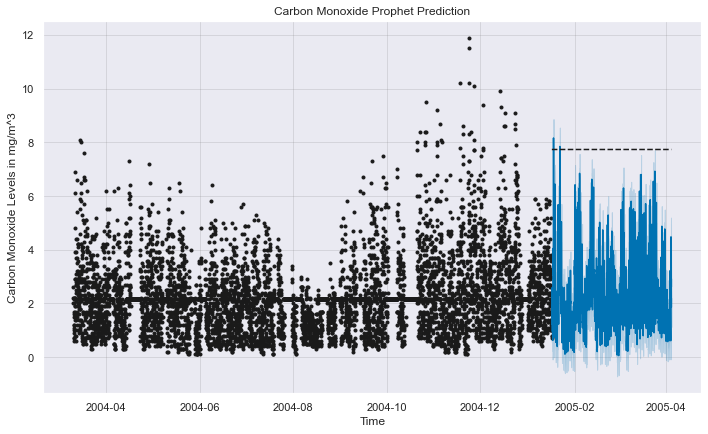

In [366]:
#Make prediction on future CO and visualize
#Visualize change points so I can play around with hyperparameters
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
forecast = co.predict(test_df)
fig = co.plot(forecast, xlabel = "Time", ylabel = 'Carbon Monoxide Levels in mg/m^3')
plt.title("Carbon Monoxide Prophet Prediction")
#a = add_changepoints_to_plot(fig.gca(),co,forecast)
#forecast.head()

In [367]:
#Evaluate the accuracy of the current model
from prophet.diagnostics import cross_validation

#Calculate mean absolute percentage - lower = better. 
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [368]:
#Initial is the initial training period. Period is the length that we perform the cross validation for.
#Horizon is the prediction of each fold. I.e. how far ahead we are looking. Look a day ahead.
cv_results = cross_validation(co, initial = '300 days', period = '312 days', horizon = '24 hours')
baseline = mean_absolute_percentage_error(cv_results.y, cv_results.yhat)
print("MSE on Test Data", np.mean(np.square(cv_results.yhat - cv_results.y)))
print("Mean Absolute Percentage Error: ", baseline,"%")

INFO:prophet:Making 1 forecasts with cutoffs between 2005-01-15 15:00:00 and 2005-01-15 15:00:00
100%|██████████| 1/1 [00:13<00:00, 13.78s/it]

MSE on Test Data 0.06908617753218983
Mean Absolute Percentage Error:  7.564145216129393 %


In [369]:
from prophet.diagnostics import performance_metrics
pm = performance_metrics(cv_results)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 02:00:00,0.267135,0.516851,0.378649,0.126371,0.126371,0.113180,0.5
1,0 days 03:00:00,0.501343,0.708056,0.707690,0.214300,0.214300,0.193246,0.5
2,0 days 04:00:00,0.235174,0.484947,0.359865,0.095904,0.095904,0.088052,1.0
3,0 days 05:00:00,0.013044,0.114210,0.096260,0.027243,0.027243,0.026674,1.0
4,0 days 06:00:00,0.019070,0.138095,0.136446,0.039893,0.039893,0.039084,1.0
5,0 days 07:00:00,0.026710,0.163431,0.157778,0.059558,0.059558,0.057488,1.0
6,0 days 08:00:00,0.020307,0.142504,0.110903,0.047132,0.047132,0.045301,1.0
7,0 days 09:00:00,0.122408,0.349868,0.257870,0.068612,0.068612,0.073124,1.0
8,0 days 10:00:00,0.182276,0.426938,0.420508,0.119213,0.119213,0.126841,1.0
9,0 days 11:00:00,0.076887,0.277285,0.264969,0.097801,0.097801,0.102893,1.0


Text(0.5, 1.0, 'Carbon Monoxide MSE for 24-Hour Forecast')

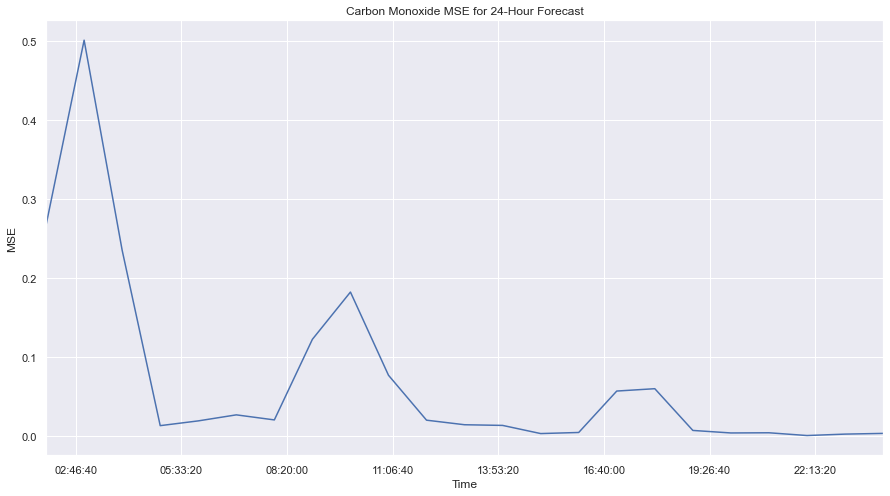

In [370]:
pm = pm.set_index("horizon")
pm['mse'].plot(xlabel = "Time", ylabel = "MSE")
plt.title('Carbon Monoxide MSE for 24-Hour Forecast')

### Benzene Prediction

In [371]:
time_series = new_df.rename(columns = {'C6H6(GT)':'y'})
time_series.index.names = ['ds']
time_series['cap'] = 17.5
split = len(new_df) - int(0.2 * len(new_df))
train_df, test_df = time_series[0:split], time_series[split:]
train_df

,CO(GT),PT08.S1(CO),y,NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cap
ds,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,17.5
2004-03-10 19:00:00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,17.5
2004-03-10 20:00:00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,17.5
2004-03-10 21:00:00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,17.5
2004-03-10 22:00:00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-16 11:00:00,1.0,850.0,2.6,138.0,1076.0,96.0,847.0,597.0,10.7,34.4,0.4406,17.5
2005-01-16 12:00:00,0.8,831.0,2.2,121.0,1123.0,89.0,824.0,527.0,11.1,33.4,0.4401,17.5
2005-01-16 13:00:00,1.0,866.0,3.0,143.0,1060.0,98.0,857.0,573.0,11.9,30.8,0.4285,17.5


In [372]:
train_df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'y', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'cap'],
      dtype='object')

In [373]:
#Reset the index
train_df = train_df.reset_index()
test_df = test_df.reset_index()
#Drop the predictor
test_df = test_df.drop(columns = "y")

In [374]:
train_df['y'].mean()

10.606581551123956

In [375]:
ch = Prophet(weekly_seasonality = True, changepoint_range = 0.5, growth = 'logistic')
#['ds', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)',
#       'y', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'cap']
ch.add_regressor('CO(GT)')
#ch.add_regressor('PT08.S1(CO)')
#ch.add_regressor('NO2(GT)')
ch.add_regressor('PT08.S3(NOx)')
ch.add_regressor('PT08.S4(NO2)')
ch.add_regressor('PT08.S5(O3)')
ch.add_regressor('T')
ch.add_regressor('RH')
ch.add_regressor('AH')
ch.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Text(0.5, 1.0, 'Benzene Prophet Prediction')

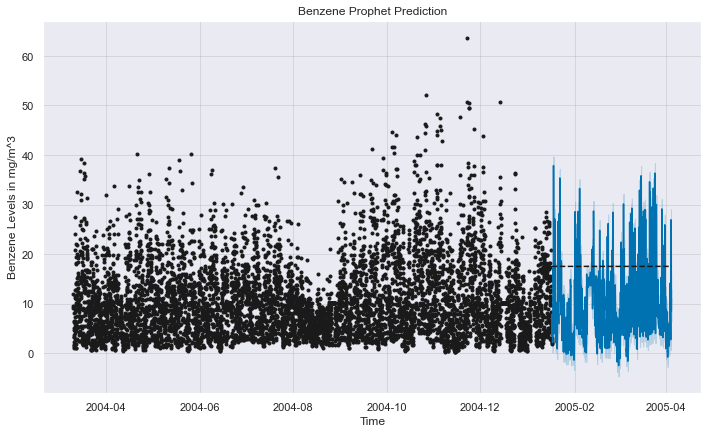

In [376]:
forecast = ch.predict(test_df)
#a = add_changepoints_to_plot(fig.gca(),co,forecast)
#forecast.head()
chfig = ch.plot(forecast, xlabel = "Time", ylabel = 'Benzene Levels in mg/m^3')
plt.title("Benzene Prophet Prediction")

In [377]:
#300, 312, 24
cv_results = cross_validation(ch, initial = '300 days', period = '312 days', horizon = '24 hours')
baseline = mean_absolute_percentage_error(cv_results.y, cv_results.yhat)
print("MSE on Test Data", np.mean(np.square(cv_results.yhat - cv_results.y)))
print("Mean Absolute Percentage Error: ", baseline,"%")
pm = performance_metrics(cv_results)
pm

INFO:prophet:Making 1 forecasts with cutoffs between 2005-01-15 15:00:00 and 2005-01-15 15:00:00
100%|██████████| 1/1 [00:30<00:00, 30.63s/it]

MSE on Test Data 0.7089911872293198
Mean Absolute Percentage Error:  7.082811104144017 %


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 02:00:00,5.174325,2.274714,2.271901,0.175618,0.175618,0.161004,0.0
1,0 days 03:00:00,3.211468,1.792057,1.743195,0.109162,0.109162,0.103052,0.5
2,0 days 04:00:00,0.915042,0.956578,0.793812,0.044400,0.044400,0.042959,1.0
3,0 days 05:00:00,0.551666,0.742742,0.638872,0.046005,0.046005,0.044446,1.0
4,0 days 06:00:00,0.537381,0.733063,0.607659,0.046476,0.046476,0.044911,1.0
5,0 days 07:00:00,0.445435,0.667409,0.560280,0.062321,0.062321,0.059347,1.0
6,0 days 08:00:00,0.604159,0.777277,0.760009,0.082494,0.082494,0.078861,1.0
7,0 days 09:00:00,0.184000,0.428953,0.352153,0.030838,0.030838,0.030118,1.0
8,0 days 10:00:00,0.114070,0.337742,0.286337,0.027689,0.027689,0.027123,1.0
9,0 days 11:00:00,0.130968,0.361895,0.339137,0.037749,0.037749,0.037005,1.0


Text(0.5, 1.0, 'Benzene MSE for 24-Hour Forecast')

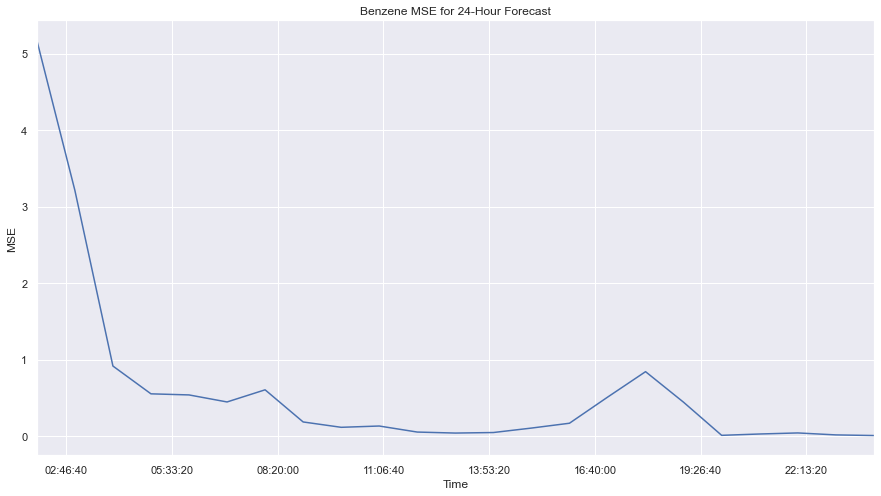

In [378]:
pm = pm.set_index("horizon")
pm['mse'].plot(xlabel = "Time", ylabel = "MSE")
plt.title('Benzene MSE for 24-Hour Forecast')

### NOx Prediction

In [379]:
#PT08.S1(CO)	NMHC(GT)	C6H6(GT)	PT08.S2(NMHC)	NOx(GT)	PT08.S3(NOx)	NO2(GT)	PT08.S4(NO2)	PT08.S5(O3)
time_series = new_df.rename(columns = {'NOx(GT)':'y'})
time_series.index.names = ['ds']
time_series['cap'] = 700
split = len(new_df) - int(0.2 * len(new_df))
train_df, test_df = time_series[0:split], time_series[split:]
train_df

,CO(GT),PT08.S1(CO),C6H6(GT),y,PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cap
ds,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,700
2004-03-10 19:00:00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,700
2004-03-10 20:00:00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,700
2004-03-10 21:00:00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,700
2004-03-10 22:00:00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,700
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-16 11:00:00,1.0,850.0,2.6,138.0,1076.0,96.0,847.0,597.0,10.7,34.4,0.4406,700
2005-01-16 12:00:00,0.8,831.0,2.2,121.0,1123.0,89.0,824.0,527.0,11.1,33.4,0.4401,700
2005-01-16 13:00:00,1.0,866.0,3.0,143.0,1060.0,98.0,857.0,573.0,11.9,30.8,0.4285,700


In [380]:
#Reset the index
train_df = train_df.reset_index()
test_df = test_df.reset_index()
#Drop the predictor
test_df = test_df.drop(columns = "y")

In [381]:
train_df.max()

ds              2005-01-16 15:00:00
CO(GT)                         11.9
PT08.S1(CO)                  2040.0
C6H6(GT)                       63.7
y                            1479.0
PT08.S3(NOx)                 2683.0
NO2(GT)                       288.0
PT08.S4(NO2)                 2775.0
PT08.S5(O3)                  2523.0
T                              44.6
RH                             88.7
AH                            2.231
cap                             700
dtype: object

In [382]:
nox = Prophet(weekly_seasonality = True, changepoint_range = 0.8, growth = 'logistic')
nox.add_regressor('CO(GT)')
#nox.add_regressor('C6H6(GT)')
nox.add_regressor('NO2(GT)')
#nox.add_regressor('PT08.S1(CO)')
nox.add_regressor('PT08.S3(NOx)')
nox.add_regressor('PT08.S4(NO2)')
nox.add_regressor('PT08.S5(O3)')
nox.add_regressor('T')
nox.add_regressor('RH')
nox.add_regressor('AH')
nox.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Text(0.5, 1.0, 'Nitrious Oxides Prophet Prediction')

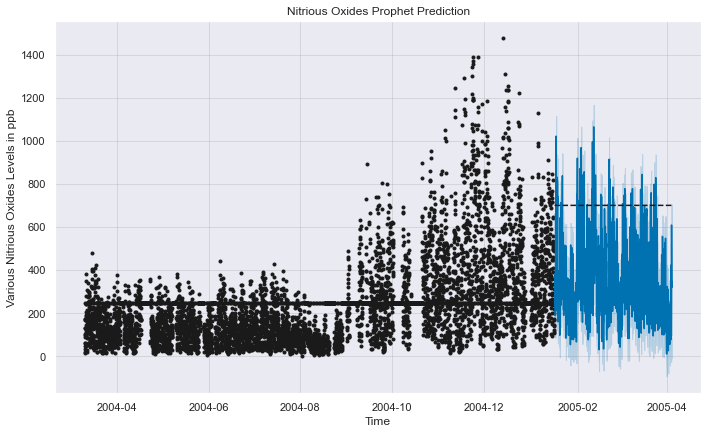

In [383]:
forecast = nox.predict(test_df)
#a = add_changepoints_to_plot(fig.gca(),co,forecast)
#forecast.head()
chfig = nox.plot(forecast, xlabel = 'Time', ylabel = 'Various Nitrious Oxides Levels in ppb')
plt.title('Nitrious Oxides Prophet Prediction')

In [384]:
cv_results = cross_validation(nox, initial = '300 days', period = '312 days', horizon = '24 hours')
baseline = mean_absolute_percentage_error(cv_results.y, cv_results.yhat)
print("MSE on Test Data", np.mean(np.square(cv_results.yhat - cv_results.y)))
print("Mean Absolute Percentage Error: ", baseline,"%")
pm = performance_metrics(cv_results)
pm

INFO:prophet:Making 1 forecasts with cutoffs between 2005-01-15 15:00:00 and 2005-01-15 15:00:00
100%|██████████| 1/1 [00:17<00:00, 17.51s/it]

MSE on Test Data 6740.464744235748
Mean Absolute Percentage Error:  33.6012378217841 %


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 02:00:00,3353.214340,57.906946,42.283395,0.102698,0.102698,0.093604,1.0
1,0 days 03:00:00,2628.107538,51.265071,37.583953,0.059241,0.059241,0.062643,1.0
2,0 days 04:00:00,10373.262465,101.849214,98.469261,0.132881,0.132881,0.142576,0.5
3,0 days 05:00:00,7750.732861,88.038247,63.214687,0.078201,0.078201,0.084496,0.5
4,0 days 06:00:00,246.302460,15.694026,12.024696,0.021661,0.021661,0.022055,1.0
5,0 days 07:00:00,776.027222,27.857265,27.358358,0.061652,0.061652,0.060364,1.0
6,0 days 08:00:00,605.079134,24.598356,22.364541,0.054230,0.054230,0.052698,1.0
7,0 days 09:00:00,523.123182,22.871886,21.055241,0.040557,0.040557,0.039935,1.0
8,0 days 10:00:00,1258.518600,35.475606,35.104717,0.069532,0.069532,0.067119,1.0
9,0 days 11:00:00,5164.646415,71.865474,66.778410,0.200571,0.200571,0.177050,1.0


Text(0.5, 1.0, 'Nitrious Oxides MSE for 24-Hour Forecast')

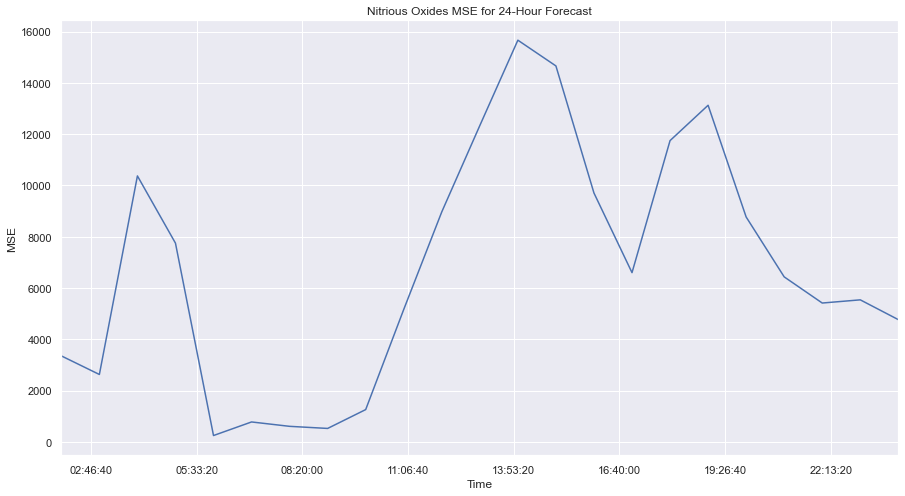

In [385]:
pm = pm.set_index("horizon")
pm['mse'].plot(xlabel = "Time", ylabel = "MSE")
plt.title('Nitrious Oxides MSE for 24-Hour Forecast')

### NO2 Prediction

In [386]:
#PT08.S1(CO)	NMHC(GT)	C6H6(GT)	PT08.S2(NMHC)	NOx(GT)	PT08.S3(NOx)	NO2(GT)	PT08.S4(NO2)	PT08.S5(O3)
time_series = new_df.rename(columns = {'NO2(GT)':'y'})
time_series.index.names = ['ds']
time_series['cap'] = 187.2
split = len(new_df) - int(0.2 * len(new_df))
train_df, test_df = time_series[0:split], time_series[split:]
train_df

,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),y,PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cap
ds,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,187.2
2004-03-10 19:00:00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,187.2
2004-03-10 20:00:00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,187.2
2004-03-10 21:00:00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,187.2
2004-03-10 22:00:00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,187.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-16 11:00:00,1.0,850.0,2.6,138.0,1076.0,96.0,847.0,597.0,10.7,34.4,0.4406,187.2
2005-01-16 12:00:00,0.8,831.0,2.2,121.0,1123.0,89.0,824.0,527.0,11.1,33.4,0.4401,187.2
2005-01-16 13:00:00,1.0,866.0,3.0,143.0,1060.0,98.0,857.0,573.0,11.9,30.8,0.4285,187.2


In [387]:
train_df.max()

CO(GT)            11.900
PT08.S1(CO)     2040.000
C6H6(GT)          63.700
NOx(GT)         1479.000
PT08.S3(NOx)    2683.000
y                288.000
PT08.S4(NO2)    2775.000
PT08.S5(O3)     2523.000
T                 44.600
RH                88.700
AH                 2.231
cap              187.200
dtype: float64

In [388]:
#Reset the index
train_df = train_df.reset_index()
test_df = test_df.reset_index()
#Drop the predictor
test_df = test_df.drop(columns = "y")

In [389]:
no2 = Prophet(weekly_seasonality = True, changepoint_range = 0.9, growth = 'logistic')
#no2.add_regressor('CO(GT)')
no2.add_regressor('NOx(GT)')
no2.add_regressor('C6H6(GT)')
#no2.add_regressor('PT08.S1(CO)')
no2.add_regressor('PT08.S3(NOx)')
#no2.add_regressor('PT08.S4(NO2)')
#no2.add_regressor('PT08.S5(O3)')
no2.add_regressor('T')
no2.add_regressor('RH')
no2.add_regressor('AH')
no2.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Text(0.5, 1.0, 'Nitrious Dioxide Prediction')

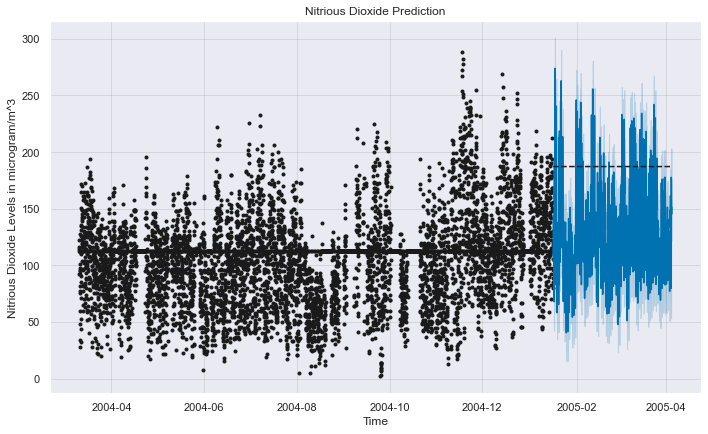

In [390]:
forecast = no2.predict(test_df)
#a = add_changepoints_to_plot(fig.gca(),co,forecast)
#forecast.head()
chfig = no2.plot(forecast, xlabel = 'Time', ylabel = 'Nitrious Dioxide Levels in microgram/m^3')
plt.title('Nitrious Dioxide Prediction')

In [391]:
cv_results = cross_validation(no2, initial = '300 days', period = '312 days', horizon = '48 hours')
baseline = mean_absolute_percentage_error(cv_results.y, cv_results.yhat)
print("MSE on Test Data", np.mean(np.square(cv_results.yhat - cv_results.y)))
print("Mean Absolute Percentage Error: ", baseline,"%")
pm = performance_metrics(cv_results)

INFO:prophet:Making 1 forecasts with cutoffs between 2005-01-14 15:00:00 and 2005-01-14 15:00:00
100%|██████████| 1/1 [00:11<00:00, 11.02s/it]

MSE on Test Data 332.8376606169366
Mean Absolute Percentage Error:  10.41573507780379 %


Text(0.5, 1.0, 'Nitrious Dioxide MSE for 24-Hour Forecast')

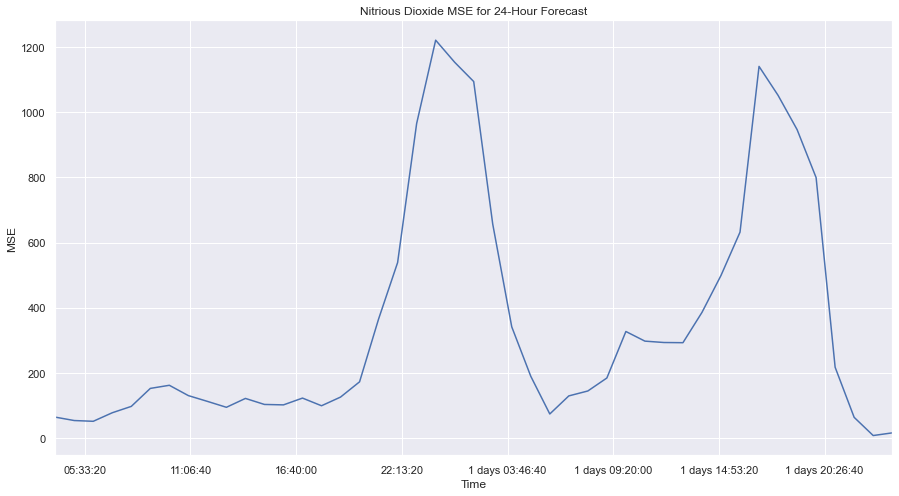

In [392]:
pm = pm.set_index("horizon")
pm['mse'].plot(xlabel = "Time", ylabel = "MSE")
plt.title('Nitrious Dioxide MSE for 24-Hour Forecast')

## Multivariate LTSM Model - Starting with Carbon Monoxide

In [393]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [394]:
#Turns the time series data into a supervised dataset for LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [395]:
#Need to normalize the data due to large differences in values.
scaler = MinMaxScaler(feature_range = (0, 1))
encoder = LabelEncoder()
values = new_df.values
values[:,4] = encoder.fit_transform(values[:,4])
scaled = scaler.fit_transform(values)
print(scaled.shape)
reframe = series_to_supervised(scaled, 1, 1)
reframe.columns
#var1(t-1) 1st input variable and var1(t) is the 1st output variable. 
#Predict on 11, 13, 14, 16
reframe.drop(reframe.columns[[12, 13, 14, 15, 16, 17, 18, 19, 20,21]], axis=1, inplace=True)
print(reframe.head())
#Set new training and test split

(9357, 11)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.211864   0.511845   0.185535   0.111036   0.573301   0.328402   
2   0.161017   0.463029   0.146226   0.068382   0.669943   0.266272   
3   0.177966   0.541996   0.139937   0.087339   0.642097   0.331361   
4   0.177966   0.523331   0.143082   0.115098   0.602785   0.355030   
5   0.127119   0.448672   0.100629   0.087339   0.694513   0.337278   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)   var1(t)  
1   0.513040   0.454822   0.333333    0.499371    0.280066  0.161017  
2   0.453237   0.326238   0.326882    0.484277    0.264282  0.177966  
3   0.451439   0.370547   0.296774    0.563522    0.276352  0.177966  
4   0.464478   0.426586   0.277419    0.638994    0.294190  0.127119  
5   0.422212   0.386186   0.281720    0.633962    0.295216  0.093220  


In [396]:
#Split into training and testing sets
values = reframe.values
split = len(new_df) - int(0.2 * len(new_df))
train, test = values[0:split], values[split:]
#Might need to change training set here remove the first input
trainX, trainY = train[:, :-1], train[:, -1]
testX, testY = test[:, :-1], test[:, -1]
#reshape into a 3D set
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

In [397]:
#Create and fit the LTSM network. Starting off with a visible layer with 1 input. A hidden layer with 4 ltsm blocks, and an output that makes a single value prediction. 
#Trained for 40 epochs with a batch size of 64.
# fix random seed for reproducibility
#np.random.seed(1)
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs = 40, batch_size=64, validation_data = (testX, testY) ,verbose=2, shuffle = False)

Epoch 1/40
117/117 - 3s - loss: 0.0089 - val_loss: 0.0066
Epoch 2/40
117/117 - 0s - loss: 0.0049 - val_loss: 0.0063
Epoch 3/40
117/117 - 0s - loss: 0.0047 - val_loss: 0.0059
Epoch 4/40
117/117 - 0s - loss: 0.0045 - val_loss: 0.0058
Epoch 5/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0054
Epoch 6/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0053
Epoch 7/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0051
Epoch 8/40
117/117 - 0s - loss: 0.0042 - val_loss: 0.0050
Epoch 9/40
117/117 - 0s - loss: 0.0041 - val_loss: 0.0049
Epoch 10/40
117/117 - 0s - loss: 0.0041 - val_loss: 0.0048
Epoch 11/40
117/117 - 0s - loss: 0.0041 - val_loss: 0.0047
Epoch 12/40
117/117 - 0s - loss: 0.0041 - val_loss: 0.0047
Epoch 13/40
117/117 - 0s - loss: 0.0041 - val_loss: 0.0045
Epoch 14/40
117/117 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 15/40
117/117 - 0s - loss: 0.0039 - val_loss: 0.0045
Epoch 16/40
117/117 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 17/40
117/117 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 

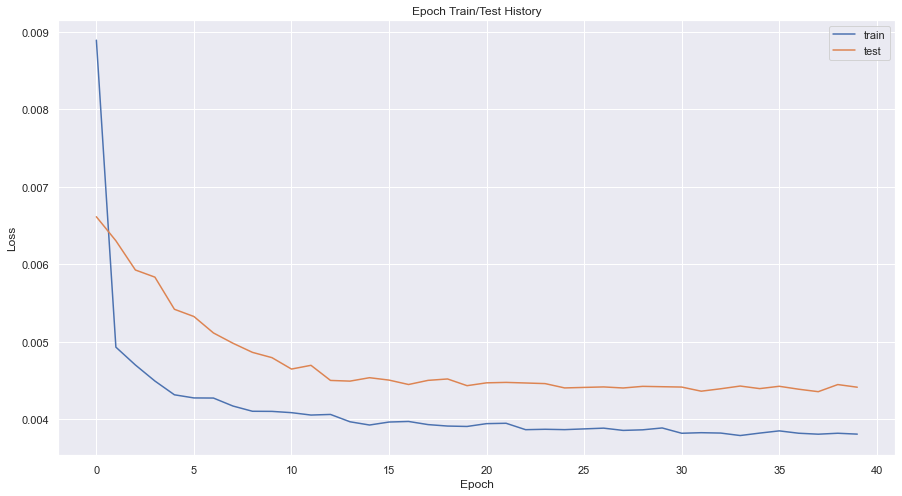

In [398]:
#PLot the history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.title('Epoch Train/Test History')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [399]:
#testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))
#Evaluate the model
#Make a prediction
#Orignal testX
yhat = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
#invert scaling for forecasting
#print(testX[:,1:].shape)
inv_yhat = np.concatenate((yhat, testX[:, 1:]), axis = 1)
#print(testX.shape, inv_yhat.shape, yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
#Invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = np.concatenate((testY, testX[:, 1:]), axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mse = mean_squared_error(inv_y, inv_yhat)
print('Test RMSE: %.3F' % rmse)
print('Test MSE: %.3F' % mse)
#forecast_errors = [inv_y[i]-inv_yhat[i] for i in range(len(inv_y))]
#print('Forecast Errors: %s' % forecast_errors)
#bias = sum(forecast_errors) * 1.0/len(inv_y)
#print('Forecast Bias: %f' % bias)
#mae = mean_absolute_error(inv_y, inv_yhat)
#print('MAE: %f' % mae)

Test RMSE: 0.784
Test MSE: 0.615


In [400]:
testX[-24:].shape

(24, 11)

In [401]:
trainX.shape

(7486, 1, 11)

In [402]:
new_df[-24:].shape

(24, 11)

In [403]:
#n_future = 24
#predictions_future = model.predict(testX[-24:])
#y_pred_future = sc_predict.inverse_transform(predictions_future)
#Create dataframe with future dates
#from pandas.tseries.offsets import DateOffset
#add_time = [new_df.index[-1] + DateOffset(hours = x) for x in range(0, 25)]
#pred_future = pd.DataFrame(y_pred_future[:, 0:1], index = add_time[1:], columns = ['CO Prediction'])

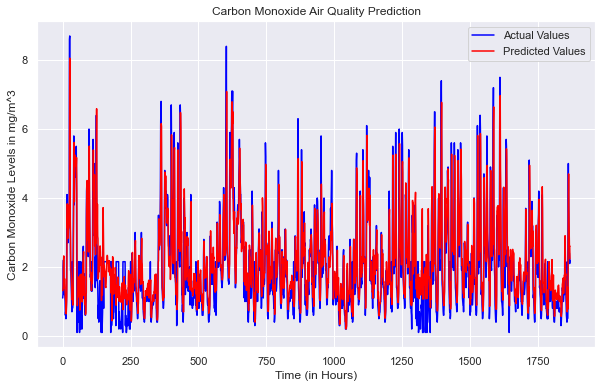

In [404]:
pyplot.figure(figsize=(10,6))
pyplot.plot(inv_y, color='blue', label='Actual Values')
plt.plot(inv_yhat , color='red', label='Predicted Values')
plt.title('Carbon Monoxide Air Quality Prediction')
plt.xlabel('Time (in Hours)')
plt.ylabel('Carbon Monoxide Levels in mg/m^3')
plt.legend()
plt.show()

In [405]:
#Attempt to predict into the future and evaluate. Currently not working properly...

from sklearn.preprocessing import StandardScaler

train_df = new_df
train_df = train_df.astype(float)
training_set = train_df.values
sc = StandardScaler()
scaled_train = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[ 0.33985649],
       [-0.11607126],
       [ 0.03590466],
       ...,
       [ 0.18788057],
       [-0.0400833 ],
       [ 0.03590466]])

In [406]:
train_df.shape

(9357, 11)

In [407]:
X_train = []
y_train = []

n_future = 24   # Number of hours we want top predict into the future
n_past =  7410    # Number of past days we want to use to predict the future

for i in range(n_past, len(scaled_train) - n_future +1):
    X_train.append(scaled_train[i - n_past:i, 0:train_df.shape[1] - 1])
    y_train.append(scaled_train[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (1924, 7410, 10).
y_train shape == (1924, 1).


In [408]:
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(n_past, train_df.shape[1]-1)))

# Adding Dropout
model.add(Dropout(0.20))

# Output layer
model.add(Dense(1))

# Compiling the Neural Network
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [409]:
#Orginally was 40 epochs. Made 20 so its faster and just need a proof of concept right now.
history = model.fit(X_train, y_train, shuffle=False, epochs=20,  validation_split=0.2, verbose=2, batch_size=64)

Epoch 1/20
25/25 - 105s - loss: 1.1264 - val_loss: 0.9478
Epoch 2/20
25/25 - 103s - loss: 1.0924 - val_loss: 0.9435
Epoch 3/20
25/25 - 105s - loss: 1.0890 - val_loss: 0.9444
Epoch 4/20
25/25 - 111s - loss: 1.0866 - val_loss: 0.9440
Epoch 5/20
25/25 - 108s - loss: 1.0847 - val_loss: 0.9437
Epoch 6/20
25/25 - 102s - loss: 1.0831 - val_loss: 0.9436
Epoch 7/20
25/25 - 98s - loss: 1.0819 - val_loss: 0.9435
Epoch 8/20
25/25 - 107s - loss: 1.0808 - val_loss: 0.9434
Epoch 9/20
25/25 - 95s - loss: 1.0799 - val_loss: 0.9433
Epoch 10/20
25/25 - 98s - loss: 1.0792 - val_loss: 0.9433
Epoch 11/20
25/25 - 97s - loss: 1.0784 - val_loss: 0.9432
Epoch 12/20
25/25 - 99s - loss: 1.0778 - val_loss: 0.9432
Epoch 13/20
25/25 - 101s - loss: 1.0773 - val_loss: 0.9431
Epoch 14/20
25/25 - 98s - loss: 1.0769 - val_loss: 0.9431
Epoch 15/20
25/25 - 100s - loss: 1.0766 - val_loss: 0.9431
Epoch 16/20
25/25 - 99s - loss: 1.0763 - val_loss: 0.9430
Epoch 17/20
25/25 - 98s - loss: 1.0759 - val_loss: 0.9430
Epoch 18/20
25

In [410]:
predictions_future = model.predict(X_train[-n_future:])

In [411]:
#predictions_train = model.predict(X_train[n_past:])

In [412]:
nsamples, nx, ny = predictions_future.shape
predictions_future = predictions_future.reshape((nsamples, nx*ny))

In [413]:
#nsamples, nx, ny = predictions_train.shape
#predictions_train = predictions_train.reshape((nsamples, nx*ny))

In [414]:
#X_train[-n_future:].shape

x = np.zeros( (24, 7410, 10) )
result = X_train[-n_future:, :, 0]
print(result.shape)

(24, 7410)


In [415]:
y_pred_future = sc_predict.inverse_transform(predictions_future)

In [416]:
y_pred_future.shape

(24, 7410)

In [417]:
#result = result.flatten().shape

In [418]:
#y_pred_future = y_pred_future.flatten().shape

In [419]:
#y_pred_train = sc_predict.inverse_transform(predictions_train)

In [420]:
y_val = X_train[-n_future:].transpose(2,0,1).reshape(3,-1)
y_val = y_val[-n_future:]

In [421]:
#Y, yhat
baseline = mean_absolute_percentage_error(result, y_pred_future)
print("Mean Absolute Error", baseline)

Mean Absolute Error inf


In [422]:
#Create dataframe with future dates
from pandas.tseries.offsets import DateOffset
add_time = [new_df.index[-1] + DateOffset(hours = x) for x in range(0, 25)]
pred_future = pd.DataFrame(y_pred_future[:, 0:1], index = add_time[1:], columns = ['CO Prediction'])
#pred_train = pd.DataFrame(y_pred_train[:, 0:1], index = new_df.index[:9190], columns = ['CO Prediction'])

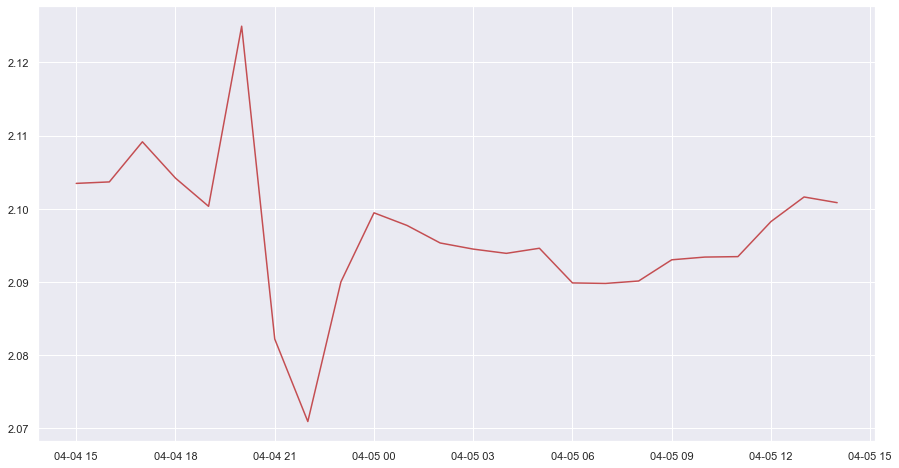

In [423]:
plt.plot(pred_future.index, pred_future['CO Prediction'], color = 'r', label = 'Predicted CO Levels')
#plt.plot(train_df['CO(GT)'], color = 'blue')
#plt.plot(pred_train, color = 'orange', label = 'Training Predictions')

## Benzene LSTM Model Prediction

In [424]:
reframe = series_to_supervised(scaled, 1, 1)
reframe.columns
#Predict on 11, 13, 14, 16
reframe.drop(reframe.columns[[11, 12, 14, 15, 16, 17, 18, 19, 20,21]], axis=1, inplace=True)
print(reframe.head())
#Split into training and testing sets
values = reframe.values
split = len(new_df) - int(0.2 * len(new_df))
train, test = values[0:split], values[split:]
#Might need to change training set here remove the first input
trainX, trainY = train[:, :-1], train[:, -1]
testX, testY = test[:, :-1], test[:, -1]
#reshape into a 3D set
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.211864   0.511845   0.185535   0.111036   0.573301   0.328402   
2   0.161017   0.463029   0.146226   0.068382   0.669943   0.266272   
3   0.177966   0.541996   0.139937   0.087339   0.642097   0.331361   
4   0.177966   0.523331   0.143082   0.115098   0.602785   0.355030   
5   0.127119   0.448672   0.100629   0.087339   0.694513   0.337278   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)   var3(t)  
1   0.513040   0.454822   0.333333    0.499371    0.280066  0.146226  
2   0.453237   0.326238   0.326882    0.484277    0.264282  0.139937  
3   0.451439   0.370547   0.296774    0.563522    0.276352  0.143082  
4   0.464478   0.426586   0.277419    0.638994    0.294190  0.100629  
5   0.422212   0.386186   0.281720    0.633962    0.295216  0.072327  


In [425]:
#np.random.seed(2)
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs = 40, batch_size=64, validation_data = (testX, testY) ,verbose=2, shuffle = False)

Epoch 1/40
117/117 - 3s - loss: 0.0112 - val_loss: 0.0036
Epoch 2/40
117/117 - 0s - loss: 0.0054 - val_loss: 0.0034
Epoch 3/40
117/117 - 0s - loss: 0.0050 - val_loss: 0.0034
Epoch 4/40
117/117 - 0s - loss: 0.0048 - val_loss: 0.0033
Epoch 5/40
117/117 - 0s - loss: 0.0046 - val_loss: 0.0032
Epoch 6/40
117/117 - 0s - loss: 0.0046 - val_loss: 0.0032
Epoch 7/40
117/117 - 0s - loss: 0.0045 - val_loss: 0.0031
Epoch 8/40
117/117 - 0s - loss: 0.0044 - val_loss: 0.0031
Epoch 9/40
117/117 - 0s - loss: 0.0044 - val_loss: 0.0031
Epoch 10/40
117/117 - 0s - loss: 0.0044 - val_loss: 0.0030
Epoch 11/40
117/117 - 0s - loss: 0.0044 - val_loss: 0.0030
Epoch 12/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0030
Epoch 13/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0030
Epoch 14/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0030
Epoch 15/40
117/117 - 0s - loss: 0.0042 - val_loss: 0.0030
Epoch 16/40
117/117 - 0s - loss: 0.0043 - val_loss: 0.0030
Epoch 17/40
117/117 - 0s - loss: 0.0042 - val_loss: 0.0029
Epoch 

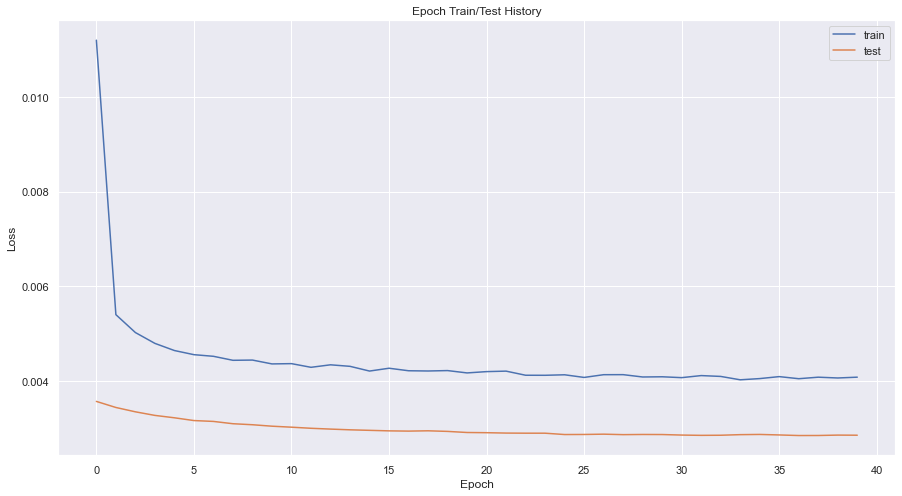

In [426]:
#PLot the history
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.title('Epoch Train/Test History')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [427]:
yhat = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
#invert scaling for forecasting
#print(testX[:,1:].shape)
inv_yhat = np.concatenate((yhat, testX[:, 1:]), axis = 1)
#print(testX.shape, inv_yhat.shape, yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
#Invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = np.concatenate((testY, testX[:, 1:]), axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mse = mean_squared_error(inv_y, inv_yhat)
print('Test RMSE: %.3F' % rmse)
print('Test MSE: %.3F' % mse)
#0.630, 0.397

Test RMSE: 0.631
Test MSE: 0.398


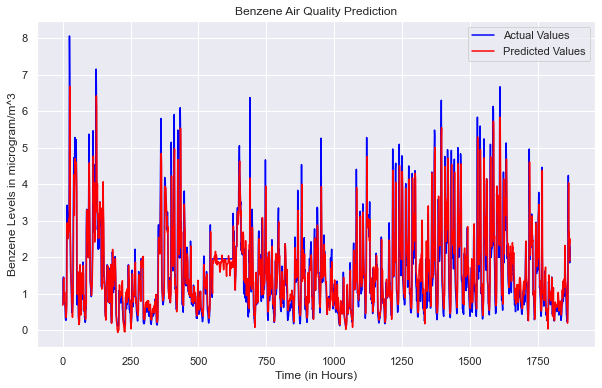

In [428]:
pyplot.figure(figsize=(10,6))
pyplot.plot(inv_y, color='blue', label='Actual Values')
plt.plot(inv_yhat , color='red', label='Predicted Values')
plt.title('Benzene Air Quality Prediction')
plt.xlabel('Time (in Hours)')
plt.ylabel('Benzene Levels in microgram/m^3')
plt.legend()
plt.show()

## Various Nitrous Oxides LSTM

In [429]:
reframe = series_to_supervised(scaled, 1, 1)
reframe.columns
#Predict on 11, 13, 14, 16
reframe.drop(reframe.columns[[11, 12, 13, 15, 16, 17, 18, 19, 20,21]], axis=1, inplace=True)
print(reframe.head())
#Split into training and testing sets
values = reframe.values
split = len(new_df) - int(0.2 * len(new_df))
train, test = values[0:split], values[split:]
#Might need to change training set here remove the first input
trainX, trainY = train[:, :-1], train[:, -1]
testX, testY = test[:, :-1], test[:, -1]
#reshape into a 3D set
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.211864   0.511845   0.185535   0.111036   0.573301   0.328402   
2   0.161017   0.463029   0.146226   0.068382   0.669943   0.266272   
3   0.177966   0.541996   0.139937   0.087339   0.642097   0.331361   
4   0.177966   0.523331   0.143082   0.115098   0.602785   0.355030   
5   0.127119   0.448672   0.100629   0.087339   0.694513   0.337278   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)   var4(t)  
1   0.513040   0.454822   0.333333    0.499371    0.280066  0.068382  
2   0.453237   0.326238   0.326882    0.484277    0.264282  0.087339  
3   0.451439   0.370547   0.296774    0.563522    0.276352  0.115098  
4   0.464478   0.426586   0.277419    0.638994    0.294190  0.087339  
5   0.422212   0.386186   0.281720    0.633962    0.295216  0.058903  


In [430]:
#Increasing batch size and epochs helped
#np.random.seed(3)
model = Sequential()
model.add(LSTM(1000, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs = 50, batch_size=128, validation_data = (testX, testY) ,verbose=2, shuffle = False)

Epoch 1/50
59/59 - 6s - loss: 0.0075 - val_loss: 0.0089
Epoch 2/50
59/59 - 2s - loss: 0.0083 - val_loss: 0.0094
Epoch 3/50
59/59 - 2s - loss: 0.0076 - val_loss: 0.0095
Epoch 4/50
59/59 - 2s - loss: 0.0075 - val_loss: 0.0105
Epoch 5/50
59/59 - 2s - loss: 0.0076 - val_loss: 0.0111
Epoch 6/50
59/59 - 3s - loss: 0.0078 - val_loss: 0.0111
Epoch 7/50
59/59 - 2s - loss: 0.0078 - val_loss: 0.0116
Epoch 8/50
59/59 - 2s - loss: 0.0079 - val_loss: 0.0123
Epoch 9/50
59/59 - 2s - loss: 0.0081 - val_loss: 0.0122
Epoch 10/50
59/59 - 2s - loss: 0.0080 - val_loss: 0.0129
Epoch 11/50
59/59 - 2s - loss: 0.0083 - val_loss: 0.0130
Epoch 12/50
59/59 - 2s - loss: 0.0082 - val_loss: 0.0129
Epoch 13/50
59/59 - 3s - loss: 0.0082 - val_loss: 0.0127
Epoch 14/50
59/59 - 2s - loss: 0.0082 - val_loss: 0.0121
Epoch 15/50
59/59 - 2s - loss: 0.0081 - val_loss: 0.0117
Epoch 16/50
59/59 - 2s - loss: 0.0079 - val_loss: 0.0111
Epoch 17/50
59/59 - 2s - loss: 0.0075 - val_loss: 0.0105
Epoch 18/50
59/59 - 2s - loss: 0.0071 - 

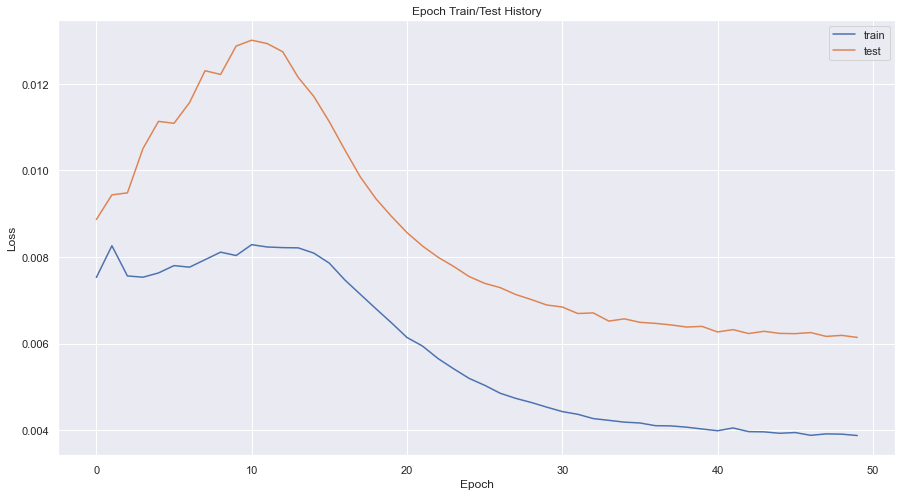

In [431]:
#PLot the history
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.title('Epoch Train/Test History')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [432]:
yhat = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
#invert scaling for forecasting
#print(testX[:,1:].shape)
inv_yhat = np.concatenate((yhat, testX[:, 1:]), axis = 1)
#print(testX.shape, inv_yhat.shape, yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
#Invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = np.concatenate((testY, testX[:, 1:]), axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mse = mean_squared_error(inv_y, inv_yhat)
print('Test RMSE: %.3F' % rmse)
print('Test MSE: %.3F' % mse)
#0.925,0.856

Test RMSE: 0.925
Test MSE: 0.855


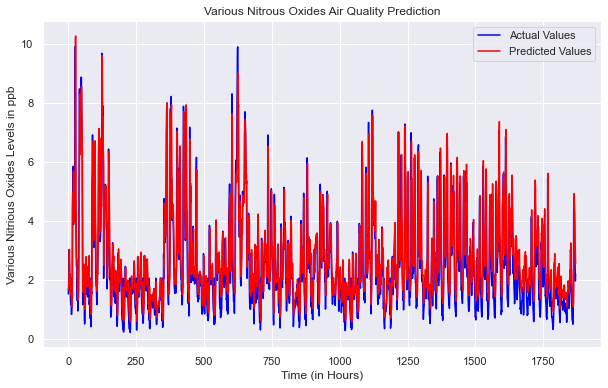

In [433]:
pyplot.figure(figsize=(10,6))
pyplot.plot(inv_y, color='blue', label='Actual Values')
plt.plot(inv_yhat , color='red', label='Predicted Values')
plt.title('Various Nitrous Oxides Air Quality Prediction')
plt.xlabel('Time (in Hours)')
plt.ylabel('Various Nitrious Oxides Levels in ppb')
plt.legend()
plt.show()

## Nitrous Dioxide LSTM

In [434]:
reframe = series_to_supervised(scaled, 1, 1)
reframe.columns
#Predict on 11, 13, 14, 16
reframe.drop(reframe.columns[[11, 12, 13,14, 15, 17, 18, 19, 20,21]], axis=1, inplace=True)
print(reframe.head())
#Split into training and testing sets
values = reframe.values
split = len(new_df) - int(0.2 * len(new_df))
train, test = values[0:split], values[split:]
#Might need to change training set here remove the first input
trainX, trainY = train[:, :-1], train[:, -1]
testX, testY = test[:, :-1], test[:, -1]
#reshape into a 3D set
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.211864   0.511845   0.185535   0.111036   0.573301   0.328402   
2   0.161017   0.463029   0.146226   0.068382   0.669943   0.266272   
3   0.177966   0.541996   0.139937   0.087339   0.642097   0.331361   
4   0.177966   0.523331   0.143082   0.115098   0.602785   0.355030   
5   0.127119   0.448672   0.100629   0.087339   0.694513   0.337278   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)   var6(t)  
1   0.513040   0.454822   0.333333    0.499371    0.280066  0.266272  
2   0.453237   0.326238   0.326882    0.484277    0.264282  0.331361  
3   0.451439   0.370547   0.296774    0.563522    0.276352  0.355030  
4   0.464478   0.426586   0.277419    0.638994    0.294190  0.337278  
5   0.422212   0.386186   0.281720    0.633962    0.295216  0.278107  


In [435]:
#Best is 40 epochs with batch size of 64, dropout of .2
#np.random.seed(5)
model = Sequential()
model.add(LSTM(75, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs = 150, batch_size=64, validation_data = (testX, testY) ,verbose=2, shuffle = False)

Epoch 1/150
117/117 - 3s - loss: 0.0139 - val_loss: 0.0128
Epoch 2/150
117/117 - 0s - loss: 0.0071 - val_loss: 0.0108
Epoch 3/150
117/117 - 0s - loss: 0.0060 - val_loss: 0.0100
Epoch 4/150
117/117 - 0s - loss: 0.0054 - val_loss: 0.0097
Epoch 5/150
117/117 - 0s - loss: 0.0050 - val_loss: 0.0093
Epoch 6/150
117/117 - 0s - loss: 0.0049 - val_loss: 0.0088
Epoch 7/150
117/117 - 0s - loss: 0.0048 - val_loss: 0.0086
Epoch 8/150
117/117 - 0s - loss: 0.0046 - val_loss: 0.0083
Epoch 9/150
117/117 - 0s - loss: 0.0046 - val_loss: 0.0082
Epoch 10/150
117/117 - 0s - loss: 0.0045 - val_loss: 0.0081
Epoch 11/150
117/117 - 0s - loss: 0.0045 - val_loss: 0.0079
Epoch 12/150
117/117 - 0s - loss: 0.0045 - val_loss: 0.0079
Epoch 13/150
117/117 - 0s - loss: 0.0044 - val_loss: 0.0076
Epoch 14/150
117/117 - 0s - loss: 0.0044 - val_loss: 0.0077
Epoch 15/150
117/117 - 0s - loss: 0.0043 - val_loss: 0.0074
Epoch 16/150
117/117 - 0s - loss: 0.0044 - val_loss: 0.0074
Epoch 17/150
117/117 - 0s - loss: 0.0043 - val_lo

117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 138/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 139/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 140/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 141/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 142/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0066
Epoch 143/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 144/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 145/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 146/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 147/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 148/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0066
Epoch 149/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067
Epoch 150/150
117/117 - 0s - loss: 0.0038 - val_loss: 0.0067


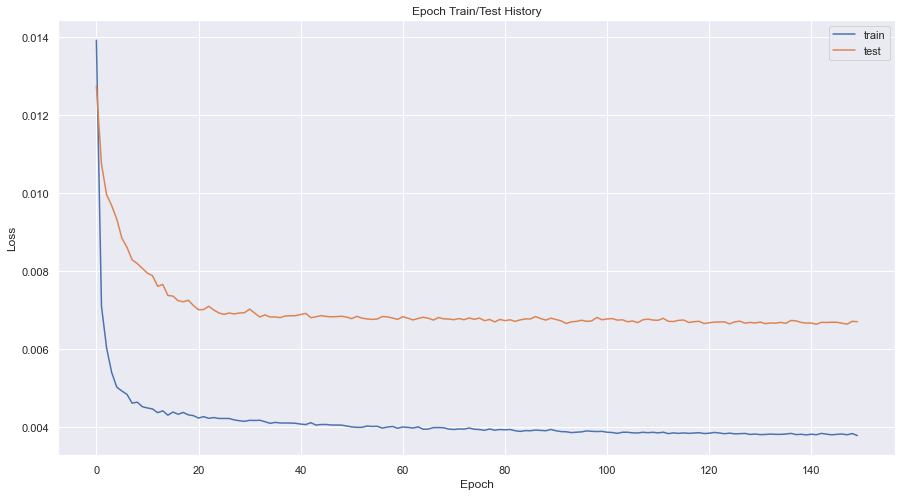

In [436]:
#PLot the history
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.title('Epoch Train/Test History')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [437]:
yhat = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
#invert scaling for forecasting
#print(testX[:,1:].shape)
inv_yhat = np.concatenate((yhat, testX[:, 1:]), axis = 1)
#print(testX.shape, inv_yhat.shape, yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
#Invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = np.concatenate((testY, testX[:, 1:]), axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mse = mean_squared_error(inv_y, inv_yhat)
print('Test RMSE: %.3F' % rmse)
print('Test MSE: %.3F' % mse)
#0.966,0.933

Test RMSE: 0.966
Test MSE: 0.933


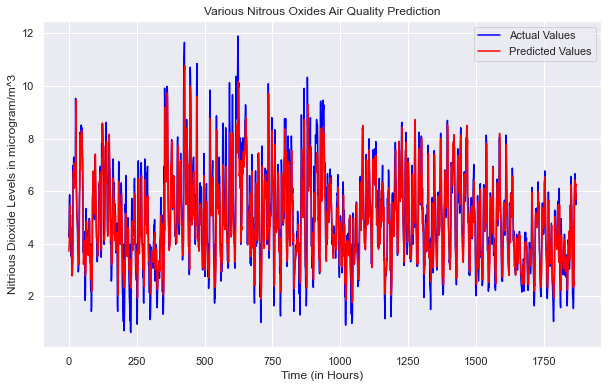

In [438]:
pyplot.figure(figsize=(10,6))
pyplot.plot(inv_y, color='blue', label='Actual Values')
plt.plot(inv_yhat , color='red', label='Predicted Values')
plt.title('Various Nitrous Oxides Air Quality Prediction')
plt.xlabel('Time (in Hours)')
plt.ylabel('Nitrious Dioxide Levels in microgram/m^3')
plt.legend()
plt.show()

## Final Model -- Univariate XGBoost - Carbon Monoxide

In [439]:
import xgboost
from xgboost import XGBRegressor

In [440]:
#Create a function to turn time series dataset into a supervised learning dataset for xgboost
def xgb_series_to_supervised(dataset, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(dataset) is list else dataset.shape[0]
    df = pd.DataFrame(dataset)
    #df = df.loc[0]
    cols = list()
    #Expect input sequence of t - n
    for x in range(n_in, 0, -1):
        cols.append(df.shift(x))
    #Expect forecasting sequence of t to t + n
    for k in range(0, n_out):
        cols.append(df.shift(-k))
    #Recombine everything
    agg = pd.concat(cols, axis = 1)
    #Drop rows with missing values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [441]:
def train_test_split(dataset, n_test):
    return dataset[:-n_test, :], dataset[-n_test:, :]

In [442]:
#Function to forecast using xgb
def xgb_forecast(training, testx):
    #Make training set an array
    training = np.asarray(training)
    #make input and output columns
    trainx, trainy = training[:, :-1], training[:, -1]
    #make the fit
    #Increase the number of estimators if worried about underlearning... Attempted to increase to 10,000 saw no improvement. Returned to baseline value.
    model = XGBRegressor(objective = 'reg:squarederror', n_estimators = 1000, random_state = 6)
    model.fit(trainx, trainy)
    #Make a one step prediction
    ypred = model.predict([testx])
    return ypred[0]

In [443]:
#Verify data using walk-forward validation
def xgb_forward_validation(dataset, n_test):
    predictions = list()
    #split dataset into train/test
    train, test = train_test_split(dataset, n_test)
    #store training dataset in history
    history = [x for x in train]
    #loop through each step in test set
    for x in range(len(test)):
        testx, testy = test[x, :-1], test[x, -1]
        yhat = xgb_forecast(history, testx)
        predictions.append(yhat)
        history.append(test[x])
        print("Expected Value: ", testy)
        print("Predicted Value: ", yhat)
        print()
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, 1], predictions

Expected Value:  1.1
Predicted Value:  1.1996038

Expected Value:  1.3
Predicted Value:  1.4938565

Expected Value:  1.4
Predicted Value:  1.283358

Expected Value:  1.2
Predicted Value:  2.043839

Expected Value:  2.7
Predicted Value:  1.0587955

Expected Value:  2.5
Predicted Value:  2.7663887

Expected Value:  1.5
Predicted Value:  1.8369359

Expected Value:  1.6
Predicted Value:  0.685764

Expected Value:  1.2
Predicted Value:  1.3855405

Expected Value:  0.9
Predicted Value:  1.099986

Expected Value:  0.6
Predicted Value:  0.7406544

Expected Value:  0.5
Predicted Value:  0.453225

Expected Value:  0.4
Predicted Value:  0.48985153

Expected Value:  2.1527495439145166
Predicted Value:  2.0081532

Expected Value:  0.5
Predicted Value:  0.73723567

Expected Value:  1.1
Predicted Value:  0.8041016

Expected Value:  4.0
Predicted Value:  2.049471

Expected Value:  5.0
Predicted Value:  4.0488334

Expected Value:  3.9
Predicted Value:  3.032677

Expected Value:  3.1
Predicted Value:  2

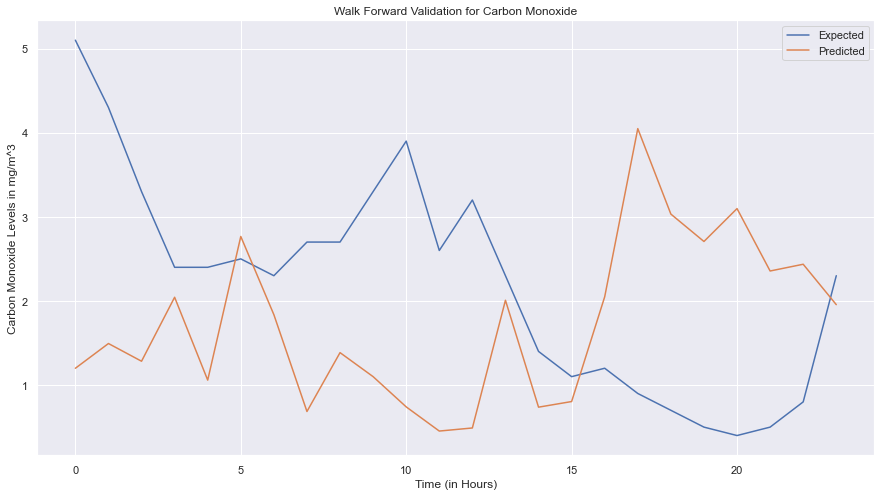

In [456]:
#need to predict on columns 0, 2, 3, 5 
series = new_df.iloc[:, 0]
value = series.values
#Changing the testing size for forward validation and batch size led to no significant improvement for any model.
#Changing the number of estimators for the model itself led to no real improvement for any model.
#Looking at the documentation for xgboost alot of the parameter tunings help with overfit which we are not experiancing
#Model is probably too simple to aacurately gauge pollutants. 
data = xgb_series_to_supervised(value, n_in = 128)
mae, y, ypred = xgb_forward_validation(data, 24)
print("Mean Absolute Error for Walk Forward: ", mae)
plt.plot(y, label = 'Expected')
plt.plot(ypred, label = 'Predicted')
plt.title("Walk Forward Validation for Carbon Monoxide")
plt.xlabel('Time (in Hours)')
plt.ylabel('Carbon Monoxide Levels in mg/m^3')
plt.legend()
plt.show()
#Number of estimators does not affect MAE indicating the model is not underlearning or its not complex enough to model

In [457]:
print("MSE for Walk Forward", np.mean(np.square(ypred - y)))

MSE for Walk Forward 4.04190638888389


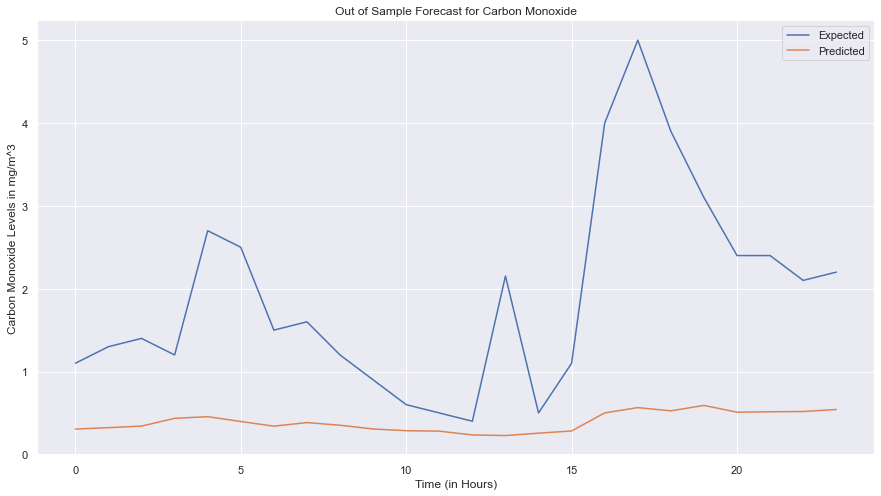

Mean Squared Error For Out of Sample Forecast:  3.4686267632745427
Mean Absolute Error:  1.5118015531255686


In [458]:
#Perform out of sample forecast
#24 n_in
from sklearn.metrics import mean_absolute_error
data = xgb_series_to_supervised(value, n_in = 24)
trainx, trainy = data[:, :-1], data[:, -1]
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainx, trainy)
#Use last 24 hours of known data
row = value[-24:].flatten()
ypred = model.predict(np.asarray([row]))
#print("Input: ", row)
#print("Predicted: ", yhat)
plt.plot(row, label = 'Expected')
plt.plot(yhat[0:24], label = 'Predicted')
plt.title("Out of Sample Forecast for Carbon Monoxide")
plt.xlabel('Time (in Hours)')
plt.ylabel('Carbon Monoxide Levels in mg/m^3')
plt.legend()
plt.show()
print("Mean Squared Error For Out of Sample Forecast: ", mean_squared_error(row, yhat[0:24]))
print("Mean Absolute Error: ", mean_absolute_error(y_true= row,y_pred=yhat[0:24]))

## Univariate XGBoost - Benzene

Expected Value:  5.4
Predicted Value:  4.958336

Expected Value:  6.3
Predicted Value:  7.0645213

Expected Value:  6.1
Predicted Value:  7.502306

Expected Value:  4.6
Predicted Value:  7.7812805

Expected Value:  11.1
Predicted Value:  3.6305077

Expected Value:  7.9
Predicted Value:  11.5354185

Expected Value:  6.0
Predicted Value:  6.7308044

Expected Value:  5.8
Predicted Value:  4.860133

Expected Value:  5.1
Predicted Value:  5.965257

Expected Value:  3.5
Predicted Value:  5.460754

Expected Value:  1.9
Predicted Value:  3.3815045

Expected Value:  1.5
Predicted Value:  1.6836138

Expected Value:  1.1
Predicted Value:  1.3137423

Expected Value:  0.8
Predicted Value:  0.7368759

Expected Value:  1.3
Predicted Value:  1.226808

Expected Value:  4.4
Predicted Value:  2.4609709

Expected Value:  17.4
Predicted Value:  9.91316

Expected Value:  22.4
Predicted Value:  23.284063

Expected Value:  13.6
Predicted Value:  15.271948

Expected Value:  13.5
Predicted Value:  10.348892

Ex

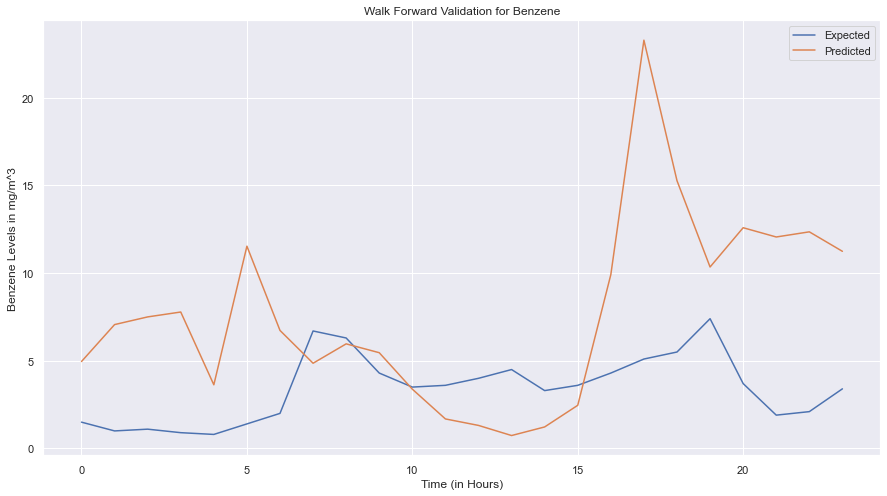

In [459]:
#need to predict on columns 0, 2, 3, 5 
series = new_df.iloc[:, 2]
value = series.values
data = xgb_series_to_supervised(value, n_in = 64)
mae, y, ypred = xgb_forward_validation(data, 24)
print("Mean Absolute Error for Walk Forward: ", mae)
plt.plot(y, label = 'Expected')
plt.plot(ypred, label = 'Predicted')
plt.title("Walk Forward Validation for Benzene")
plt.xlabel('Time (in Hours)')
plt.ylabel('Benzene Levels in mg/m^3')
plt.legend()
plt.show()

In [460]:
print("MSE for Walk Forward", np.mean(np.square(ypred - y)))

MSE for Walk Forward 46.70628449113235


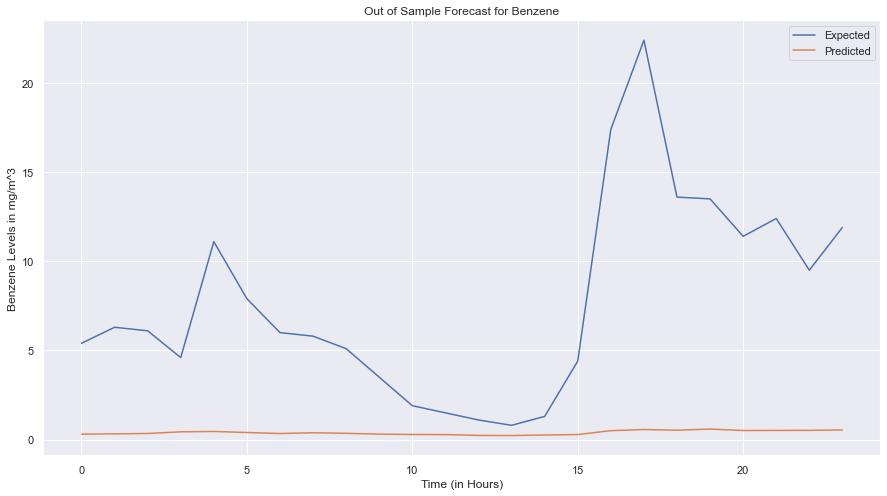

Mean Squared Error For Out of Sample Forecast:  82.02772479357252
Mean Absolute Error:  7.309603655462464


In [461]:
#Perform out of sample forecast
#24 n_in
data = xgb_series_to_supervised(value, n_in = 24)
trainx, trainy = data[:, :-1], data[:, -1]
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainx, trainy)
#Use last 24 hours of known data
row = value[-24:].flatten()
ypred = model.predict(np.asarray([row]))
#print("Input: ", row)
#print("Predicted: ", yhat)
plt.plot(row, label = 'Expected')
plt.plot(yhat[0:24], label = 'Predicted')
plt.title("Out of Sample Forecast for Benzene")
plt.xlabel('Time (in Hours)')
plt.ylabel('Benzene Levels in mg/m^3')
plt.legend()
plt.show()
print("Mean Squared Error For Out of Sample Forecast: ", mean_squared_error(row, yhat[0:24]))
print("Mean Absolute Error: ", mean_absolute_error(y_true= row,y_pred=yhat[0:24]))

## Univariate XGBoost - Various Nitrous Oxides

Expected Value:  142.0
Predicted Value:  113.43443

Expected Value:  197.0
Predicted Value:  141.13605

Expected Value:  242.0
Predicted Value:  201.19402

Expected Value:  190.0
Predicted Value:  232.31425

Expected Value:  367.0
Predicted Value:  195.28429

Expected Value:  355.0
Predicted Value:  339.7249

Expected Value:  235.0
Predicted Value:  246.44702

Expected Value:  233.0
Predicted Value:  236.59468

Expected Value:  170.0
Predicted Value:  211.93375

Expected Value:  117.0
Predicted Value:  143.83693

Expected Value:  70.0
Predicted Value:  90.642815

Expected Value:  69.0
Predicted Value:  83.193954

Expected Value:  62.0
Predicted Value:  86.94518

Expected Value:  52.0
Predicted Value:  48.947765

Expected Value:  77.0
Predicted Value:  59.799934

Expected Value:  182.0
Predicted Value:  91.10319

Expected Value:  594.0
Predicted Value:  247.3738

Expected Value:  586.0
Predicted Value:  674.70044

Expected Value:  523.0
Predicted Value:  586.1837

Expected Value:  472.0

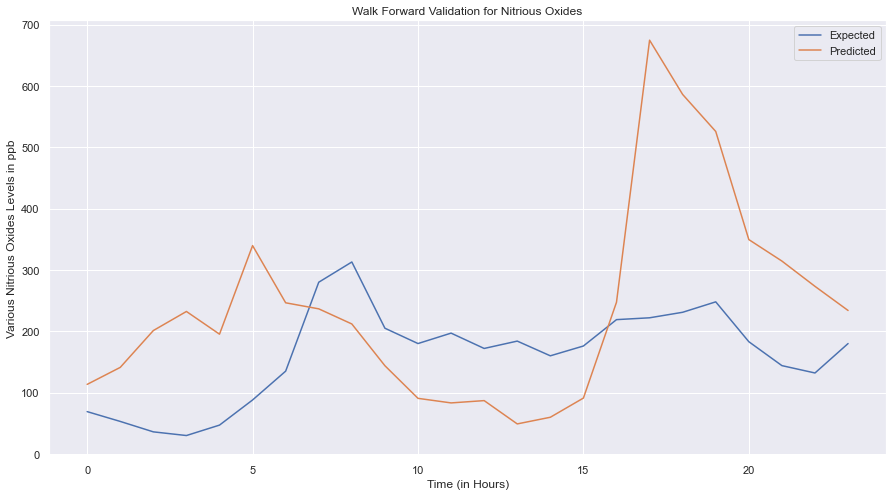

In [462]:
#need to predict on columns 0, 2, 3, 5 
series = new_df.iloc[:, 3]
value = series.values
data = xgb_series_to_supervised(value, n_in = 64)
mae, y, ypred = xgb_forward_validation(data, 24)
print("Mean Absolute Error for Walk Forward: ", mae)
plt.plot(y, label = 'Expected')
plt.plot(ypred, label = 'Predicted')
plt.title("Walk Forward Validation for Nitrious Oxides")
plt.xlabel('Time (in Hours)')
plt.ylabel('Various Nitrious Oxides Levels in ppb')
plt.legend()
plt.show()

In [463]:
print("MSE for Walk Forward", np.mean(np.square(ypred - y)))

MSE for Walk Forward 30999.7253742093


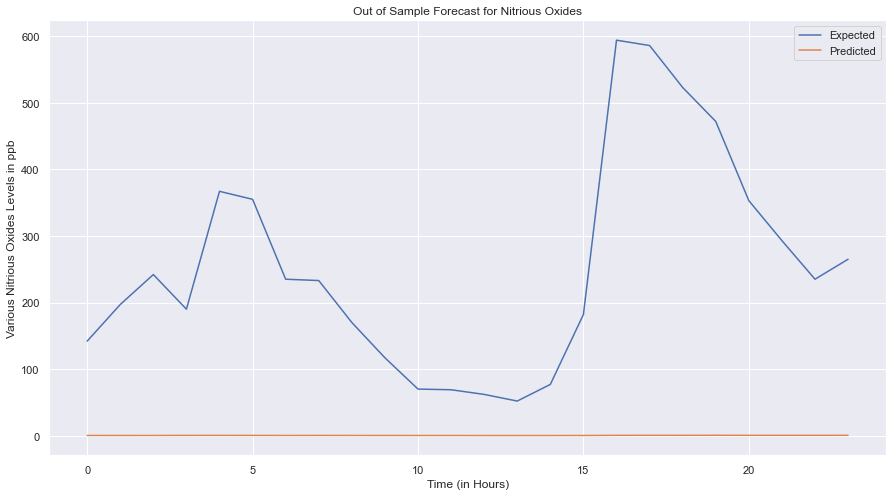

Mean Squared Error For Out of Sample Forecast:  89360.58265995444
Mean Absolute Error:  252.9804369887958


In [464]:
#Perform out of sample forecast
#24 n_in
data = xgb_series_to_supervised(value, n_in = 24)
trainx, trainy = data[:, :-1], data[:, -1]
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainx, trainy)
#Use last 24 hours of known data
row = value[-24:].flatten()
ypred = model.predict(np.asarray([row]))
#print("Input: ", row)
#print("Predicted: ", yhat)
plt.plot(row, label = 'Expected')
plt.plot(yhat[0:24], label = 'Predicted')
plt.title("Out of Sample Forecast for Nitrious Oxides")
plt.xlabel('Time (in Hours)')
plt.ylabel('Various Nitrious Oxides Levels in ppb')
plt.legend()
plt.show()
print("Mean Squared Error For Out of Sample Forecast: ", mean_squared_error(row, yhat[0:24]))
print("Mean Absolute Error: ", mean_absolute_error(y_true= row,y_pred=yhat[0:24]))

## Univariate XGBoost - Nitrious Dioxide

Expected Value:  100.0
Predicted Value:  103.90713

Expected Value:  132.0
Predicted Value:  107.31646

Expected Value:  156.0
Predicted Value:  151.70097

Expected Value:  138.0
Predicted Value:  149.06856

Expected Value:  181.0
Predicted Value:  130.14531

Expected Value:  187.0
Predicted Value:  150.8513

Expected Value:  158.0
Predicted Value:  158.0835

Expected Value:  153.0
Predicted Value:  142.02875

Expected Value:  128.0
Predicted Value:  150.94917

Expected Value:  93.0
Predicted Value:  114.590866

Expected Value:  58.0
Predicted Value:  79.91307

Expected Value:  55.0
Predicted Value:  55.75995

Expected Value:  51.0
Predicted Value:  58.036606

Expected Value:  43.0
Predicted Value:  57.327187

Expected Value:  53.0
Predicted Value:  54.26183

Expected Value:  93.0
Predicted Value:  76.82081

Expected Value:  155.0
Predicted Value:  116.34863

Expected Value:  174.0
Predicted Value:  173.48117

Expected Value:  187.0
Predicted Value:  160.7521

Expected Value:  190.0
Pr

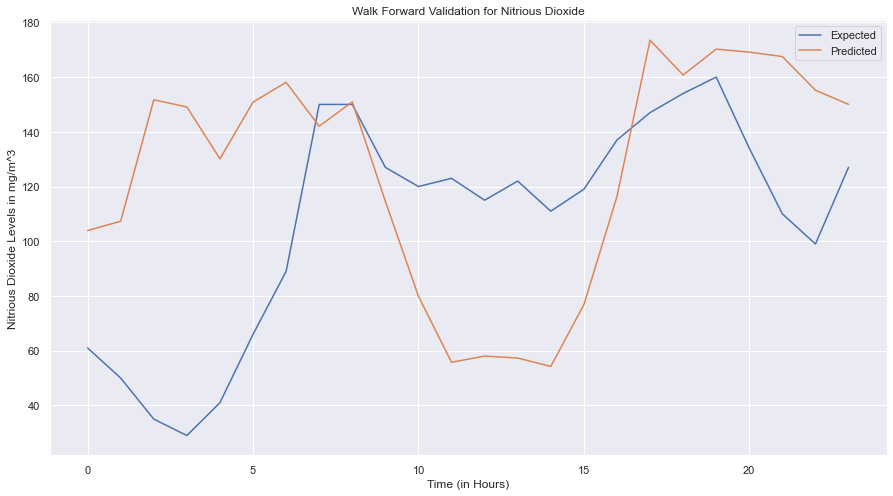

In [465]:
#need to predict on columns 0, 2, 3, 5 
series = new_df.iloc[:, 5]
value = series.values
data = xgb_series_to_supervised(value, n_in = 64)
mae, y, ypred = xgb_forward_validation(data, 24)
print("Mean Absolute Error for Walk Forward: ", mae)
plt.plot(y, label = 'Expected')
plt.plot(ypred, label = 'Predicted')
plt.title("Walk Forward Validation for Nitrious Dioxide")
plt.xlabel('Time (in Hours)')
plt.ylabel('Nitrious Dioxide Levels in mg/m^3')
plt.legend()
plt.show()

In [466]:
print("MSE for Walk Forward", np.mean(np.square(ypred - y)))

MSE for Walk Forward 3389.9211559451705


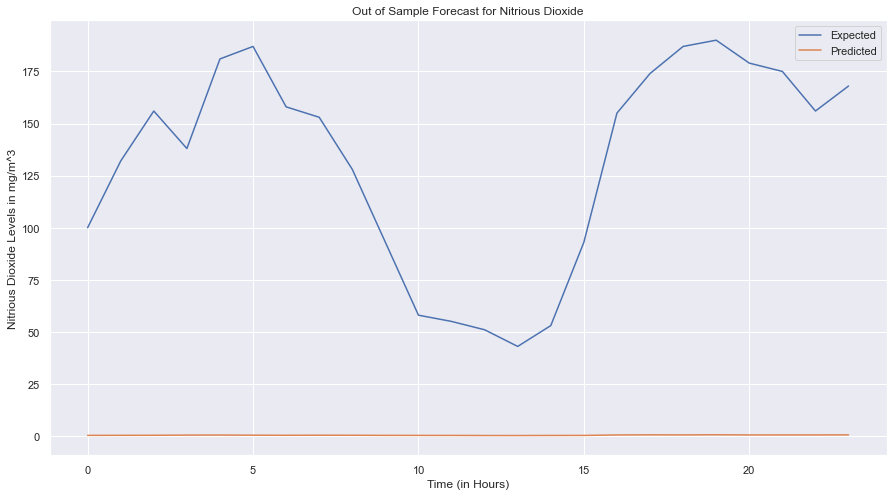

Mean Squared Error For Out of Sample Forecast:  19671.389150687424
Mean Absolute Error:  131.39710365546247


In [467]:
#Perform out of sample forecast
#24 n_in
data = xgb_series_to_supervised(value, n_in = 24)
trainx, trainy = data[:, :-1], data[:, -1]
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainx, trainy)
#Use last 24 hours of known data
row = value[-24:].flatten()
ypred = model.predict(np.asarray([row]))
#print("Input: ", row)
#print("Predicted: ", yhat)
plt.plot(row, label = 'Expected')
plt.plot(yhat[0:24], label = 'Predicted')
plt.title("Out of Sample Forecast for Nitrious Dioxide")
plt.xlabel('Time (in Hours)')
plt.ylabel('Nitrious Dioxide Levels in mg/m^3')
plt.legend()
plt.show()
print("Mean Squared Error For Out of Sample Forecast: ", mean_squared_error(row, yhat[0:24]))
print("Mean Absolute Error: ", mean_absolute_error(y_true= row,y_pred=yhat[0:24]))